In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sqlite3 as sq

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

### Loading data

#### Reading SQLite database - you will need to amend your path

In [3]:
# creating file path
dbfile = "/Users/blagabaycheva/Documents/Projects/code/STA-it402-drresscode/sta-it402-dresscode-main/code/data/sqa-data-db.sqlite"

#"/Users/blagabaycheva/Documents/Projects/code/STA-it402-drresscode/sta-it402-dresscode-main/code/data/sqa-data-db.sqlite")
# Create a SQL connection to our SQLite database
conn = sq.connect(dbfile)

In [4]:
# creating cursor
cur = conn.cursor()

# reading all table names
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
# here is your table list
print(table_list)

[('school_rolls',), ('sqa_qualification_list',), ('sqa_data',)]


In [5]:
df1 = pd.read_sql_query('SELECT * FROM school_rolls', conn)
df1.head()

,year,secondary_schools,secondary_pupils,base_year_census,index_factor,predicted
0,1966.0,NaN,283592.0,316594.0,0.895759,0
1,1967.0,665.0,288054.0,316594.0,0.909853,0
2,1968.0,640.0,295625.0,316594.0,0.933767,0
3,1969.0,616.0,307185.0,316594.0,0.970281,0
4,1970.0,441.0,317027.0,316594.0,1.001368,0


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               56 non-null     float64
 1   secondary_schools  54 non-null     float64
 2   secondary_pupils   56 non-null     float64
 3   base_year_census   56 non-null     float64
 4   index_factor       56 non-null     float64
 5   predicted          56 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 2.8 KB


In [7]:
df2 = pd.read_sql_query('SELECT * FROM sqa_qualification_list', conn)
df2.head()

,QualificationId,QualificationTitle,SCQFLevel,SecondaryYear,AdditionalYears,DataStartYear,DataEndYear
0,Higher,Higher,6,5.0,6,1986,None
1,AdvancedHigher,Advanced Higher,7,6.0,None,2001,None
2,OrdinaryGrade,Ordinary Grade,5,4.0,5;6,1986,1994
3,NewHigher,New Higher,6,5.0,6,2000;2015,2002;2015
4,StandardGrade,Standard Grade,5,4.0,5;6,1986,2013


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   QualificationId     19 non-null     object 
 1   QualificationTitle  19 non-null     object 
 2   SCQFLevel           17 non-null     object 
 3   SecondaryYear       12 non-null     float64
 4   AdditionalYears     6 non-null      object 
 5   DataStartYear       14 non-null     object 
 6   DataEndYear         6 non-null      object 
dtypes: float64(1), object(6)
memory usage: 1.2+ KB


In [9]:
df3 = pd.read_sql_query('SELECT * FROM sqa_data', conn)
df3.head()

,qualification,year,Subject,NumberOfCentres,gender,grade,NoOfStudents
0,CSYS,1986,Art and Design (Enquiry),127.0,male,Entries,86.0
1,CSYS,1986,Art and Design (Enquiry),127.0,male,percentage,0.0
2,CSYS,1986,Art and Design (Enquiry),127.0,male,A,7.0
3,CSYS,1986,Art and Design (Enquiry),127.0,male,B,13.0
4,CSYS,1986,Art and Design (Enquiry),127.0,male,C,25.0


In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159668 entries, 0 to 159667
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   qualification    159668 non-null  object 
 1   year             159668 non-null  object 
 2   Subject          159668 non-null  object 
 3   NumberOfCentres  118152 non-null  float64
 4   gender           159668 non-null  object 
 5   grade            159668 non-null  object 
 6   NoOfStudents     133842 non-null  float64
dtypes: float64(2), object(5)
memory usage: 8.5+ MB


In [11]:
df4 = pd.read_csv("subject_groups.csv")
df4.head()

,Subject,SubjectGroup,CommonSubjectLabel,qualification,year,SubjectTaken,SCQFLevel
0,English,English,English,National3,2014,Yes,3
1,English,English,English,National3,2015,Yes,3
2,English,English,English,National3,2016,Yes,3
3,English,English,English,National3,2017,Yes,3
4,English,English,English,National3,2018,Yes,3


In [12]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6176 entries, 0 to 6175
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Subject             6176 non-null   object
 1   SubjectGroup        6176 non-null   object
 2   CommonSubjectLabel  2582 non-null   object
 3   qualification       6176 non-null   object
 4   year                6176 non-null   int64 
 5   SubjectTaken        6176 non-null   object
 6   SCQFLevel           6176 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 337.9+ KB


#### Finished reading SQLite database

##### How many different grades are there?

In [13]:
df3['grade'].unique()

array(['Entries', 'percentage', 'A', 'B', 'C', 'D', 'E', 'Passes', '1',
       '2', '3', '4', '5', '6', '7', 'Comp', 'COMP',
       'PassesesInUngradedCourses', 'PassesUngraded',
       'PassesUngradedCourses', 'A-C', 'Pass', 'Attainment', 'SCQF3',
       'SCQF4', 'SCQF5', 'SCQF6', 'SCQF2', 'level2', 'level3', 'level4',
       'level5', 'level6', 'NoAward', 'A-B', 'A-D*', 'A-D'], dtype=object)

In [14]:
df3['grade'].nunique()

37

In [15]:
df3.count()

qualification      159668
year               159668
Subject            159668
NumberOfCentres    118152
gender             159668
grade              159668
NoOfStudents       133842
dtype: int64

In [16]:
df3['year'].value_counts()

2021    6681
2001    6239
2010    6073
2008    5970
2011    5959
2012    5893
2013    5886
2009    5861
2006    5788
2007    5714
2005    5552
2015    5454
2004    5402
2002    5277
2019    5255
2003    5243
2000    5188
2020    5118
2014    5014
1992    4224
1993    3840
1991    3792
2016    3592
2017    3589
2018    3556
1990    3524
1994    3280
1995    3018
1989    2904
1988    2728
1987    2446
1986    2428
1996    2400
1999    2292
1998    2268
1997    2220
Name: year, dtype: int64

In [17]:
df3['grade'].value_counts()

Entries                      26826
A                            17332
B                            14300
C                            14300
Passes                       12059
D                            11729
percentage                    7778
3                             4168
1                             4113
2                             4113
4                             4113
5                             4113
6                             2883
7                             2883
SCQF6                         2730
SCQF5                         2730
SCQF4                         2730
SCQF3                         2730
A-C                           2288
Attainment                    1746
SCQF2                         1668
PassesUngraded                1668
E                             1416
Pass                          1341
COMP                          1332
PassesesInUngradedCourses     1266
PassesUngradedCourses         1206
NoAward                        951
A-B                 

In [18]:
#df3_test['grade'].unique()

In [19]:
df3['combined']= df3['gender'] + '_' + df3['grade']

In [20]:
df3.head(5)

,qualification,year,Subject,NumberOfCentres,gender,grade,NoOfStudents,combined
0,CSYS,1986,Art and Design (Enquiry),127.0,male,Entries,86.0,male_Entries
1,CSYS,1986,Art and Design (Enquiry),127.0,male,percentage,0.0,male_percentage
2,CSYS,1986,Art and Design (Enquiry),127.0,male,A,7.0,male_A
3,CSYS,1986,Art and Design (Enquiry),127.0,male,B,13.0,male_B
4,CSYS,1986,Art and Design (Enquiry),127.0,male,C,25.0,male_C


In [21]:
# df3_acc = df3_test[(df3_test["Subject"]=="Accounting")]

In [22]:
# df3_acc.head(15)

In [23]:
df_unpack = df3.groupby(['Subject', 'qualification', 'year', 'combined'])['NoOfStudents'].aggregate('mean').unstack()


In [24]:
df_unpack.reset_index()

combined,Subject,qualification,year,NotApplicable_A,NotApplicable_A-C,NotApplicable_Attainment,NotApplicable_Entries,NotApplicable_Pass,NotKnown_A,NotKnown_A-C,NotKnown_Attainment,NotKnown_Entries,NotKnown_NoAward,NotKnown_Pass,_3,all_1,all_2,all_3,all_4,all_5,all_6,all_7,all_A,all_A-B,all_A-C,all_A-D,all_A-D*,all_Attainment,all_B,all_C,all_COMP,all_Comp,all_D,all_E,all_Entries,all_NoAward,all_Pass,all_Passes,all_PassesUngraded,all_PassesUngradedCourses,all_PassesesInUngradedCourses,all_SCQF2,all_SCQF3,all_SCQF4,all_SCQF5,all_SCQF6,all_level2,all_level3,all_level4,all_level5,all_level6,female_1,female_2,female_3,female_4,female_5,female_6,female_7,female_A,female_A-B,female_A-C,female_A-D,female_A-D*,female_Attainment,female_B,female_C,female_COMP,female_Comp,female_D,female_E,female_Entries,female_NoAward,female_Pass,female_Passes,female_PassesUngraded,female_PassesUngradedCourses,female_PassesesInUngradedCourses,female_SCQF2,female_SCQF3,female_SCQF4,female_SCQF5,female_SCQF6,female_level2,female_level3,female_level4,female_level5,female_level6,female_percentage,male_1,male_2,male_3,male_4,male_5,male_6,male_7,male_A,male_A-B,male_A-C,male_A-D,male_A-D*,male_Attainment,male_B,male_C,male_COMP,male_Comp,male_D,male_E,male_Entries,male_NoAward,male_Pass,male_Passes,male_PassesUngraded,male_PassesUngradedCourses,male_PassesesInUngradedCourses,male_SCQF2,male_SCQF3,male_SCQF4,male_SCQF5,male_SCQF6,male_level2,male_level3,male_level4,male_level5,male_level6,male_percentage,notapplicable_Entries,notapplicable_SCQF2,notapplicable_SCQF3,notapplicable_SCQF4,notapplicable_SCQF5,notapplicable_SCQF6,notknown_Entries,notknown_SCQF2,notknown_SCQF3,notknown_SCQF4,notknown_SCQF5,notknown_SCQF6
0,Accountancy,NationalProgressionAward,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0
1,Accountancy,NationalProgressionAward,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Accounting,AdvancedHigher,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,7.0,17.0,NaN,NaN,5.0,NaN,77.0,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,0.0,NaN,26.0,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,3.0,13.0,NaN,NaN,5.0,NaN,51.0,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Accounting,AdvancedHigher,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,17.0,22.0,NaN,NaN,5.0,NaN,74.0,NaN,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,8.0,9.0,NaN,NaN,3.0,NaN,30.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,9.0,13.0,NaN,NaN,2.0,NaN,44.0,NaN,NaN,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,N

In [25]:
df_new = df_unpack.filter(['Subject', 'qualification', 'year', 'all_Entries', 'all_A', 'female_A', 'male_A'], axis=1)

In [26]:
df_new.count()

combined
all_Entries    8641
all_A          5328
female_A       5102
male_A         5099
dtype: int64

In [27]:
df_new = df_unpack.filter(['Subject',
                           'qualification', 'year', 'all_Entries',
                           'male_Entries', 'female_Entries',
                           'all_A', 'female_A', 'male_A',
                           'all_B', 'female_B', 'male_B',
                           'all_C', 'female_C', 'male_C',
                           'all_A-C', 'female_A-C', 'male_A-C'], axis=1)

In [28]:
df_new.head(5)

combined                                   all_Entries  male_Entries  \
Subject     qualification            year                              
Accountancy NationalProgressionAward 2020        173.0         101.0   
                                     2021         57.0          31.0   
Accounting  AdvancedHigher           2007         77.0          51.0   
                                     2008         74.0          44.0   
                                     2009         78.0          35.0   

combined                                   female_Entries  all_A  female_A  \
Subject     qualification            year                                    
Accountancy NationalProgressionAward 2020            72.0    NaN       NaN   
                                     2021            26.0    NaN       NaN   
Accounting  AdvancedHigher           2007            26.0   12.0       3.0   
                                     2008            30.0   17.0       6.0   
                                     2009            43.0   30.0      12.0   

combined                                   male_A  all_B  female_B  male_B  \
Subject     qualification            year                                    
Accountancy NationalProgressionAward 2020     NaN    NaN       NaN     NaN   
                                     2021     NaN    NaN       NaN     NaN   
Accounting  AdvancedHigher           2007     9.0    7.0       4.0     3.0   
                                     2008    11.0   17.0       8.0     9.0   
                                     2009    18.0    7.0       7.0     0.0   

combined                                   all_C  female_C  male_C  all_A-C  \
Subject     qualification            year                                     
Accountancy NationalProgressionAward 2020    NaN       NaN     NaN      NaN   
                                     2021    NaN       NaN     NaN      NaN   
Accounting  AdvancedHigher           2007   17.0       4.0    13.0      NaN   
                                     2008   22.0       9.0    13.0      NaN   
                                     2009   17.0      10.0     7.0      NaN   

combined                                   female_A-C  male_A-C  
Subject     qualification            year                        
Accountancy NationalProgressionAward 2020         NaN       NaN  
                                     2021         NaN       NaN  
Accounting  AdvancedHigher           2007         NaN       NaN  
                                     2008         NaN       NaN  
                                     2009         NaN       NaN

In [29]:
df_new = df_new.reset_index()

In [30]:
# Combine subjects with different names

In [31]:
s_groups = pd.read_csv("subject_groups.csv")

In [32]:
s_group1 = s_groups[(s_groups['SubjectGroup'] == 'Engineering')]

In [33]:
s_group1.head(10)

,Subject,SubjectGroup,CommonSubjectLabel,qualification,year,SubjectTaken,SCQFLevel
1107,Aeronautical Engineering,Engineering,NaN,NationalCertificate,2021,Yes,3
1108,Aeronautical Engineering,Engineering,NaN,NationalCertificate,2021,Yes,4
1109,Aeronautical Engineering,Engineering,NaN,NationalCertificate,2021,Yes,5
1110,Aeronautical Engineering,Engineering,NaN,NationalCertificate,2021,Yes,6
1111,Automotive Engineering,Engineering,NaN,Intermediate2,2003,Yes,5
1112,Automotive Engineering,Engineering,NaN,Intermediate2,2004,Yes,5
1113,Automotive Engineering,Engineering,NaN,Intermediate2,2005,Yes,5
1114,Automotive Engineering,Engineering,NaN,NewHigher,2000,Yes,6
1115,Automotive Engineering,Engineering,NaN,NewHigher,2001,Yes,6
1116,Building Services Engineering,Engineering,NaN,NationalCertificate,2021,Yes,3


In [34]:
s_groups['CommonSubjectLabel'].value_counts().sort_values(ascending=False)

Math            289
English         213
Biology         213
French          199
Spanish         196
Italian         195
German          194
Gaelic          190
Physics         177
Chemistry       177
DigitalMedia    164
Russian         135
Urdu             57
Chinese          53
Greek            44
Gaidhlig         25
Mandarin         18
Portuguese       18
Swedish          18
Arithmetic        7
Name: CommonSubjectLabel, dtype: int64

In [35]:
s_groups['SubjectGroup'].value_counts().sort_values(ascending=False)

ModernLanguages               1342
ExpressiveArt                  849
ModernStudies                  805
Sciences                       567
Engineering                    436
OtherComputing                 408
Computing                      384
Maths                          296
Technology                     290
HealthAndWellBeing             240
ReligiousAndMoralEducation     223
English                        213
Technological Studies           92
Biotechnology                   31
Name: SubjectGroup, dtype: int64

In [36]:
lookup_df = s_groups[['Subject', 'qualification', 'year', 'SubjectGroup', 'CommonSubjectLabel']]

In [37]:
lookup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6176 entries, 0 to 6175
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Subject             6176 non-null   object
 1   qualification       6176 non-null   object
 2   year                6176 non-null   int64 
 3   SubjectGroup        6176 non-null   object
 4   CommonSubjectLabel  2582 non-null   object
dtypes: int64(1), object(4)
memory usage: 241.4+ KB


In [38]:
lookup_df.shape

(6176, 5)

In [39]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8752 entries, 0 to 8751
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Subject         8752 non-null   object 
 1   qualification   8752 non-null   object 
 2   year            8752 non-null   object 
 3   all_Entries     8641 non-null   float64
 4   male_Entries    8511 non-null   float64
 5   female_Entries  8491 non-null   float64
 6   all_A           5328 non-null   float64
 7   female_A        5102 non-null   float64
 8   male_A          5099 non-null   float64
 9   all_B           5077 non-null   float64
 10  female_B        3867 non-null   float64
 11  male_B          3872 non-null   float64
 12  all_C           5058 non-null   float64
 13  female_C        3848 non-null   float64
 14  male_C          3860 non-null   float64
 15  all_A-C         256 non-null    float64
 16  female_A-C      902 non-null    float64
 17  male_A-C        888 non-null    f

In [40]:
df_new['year'] = df_new['year'].astype(int)

In [41]:
merged_df = df_new.merge(lookup_df, on=(['Subject', 'qualification', 'year']), how='left')

In [42]:
merged_df.head(5)

,Subject,qualification,year,all_Entries,male_Entries,female_Entries,all_A,female_A,male_A,all_B,female_B,male_B,all_C,female_C,male_C,all_A-C,female_A-C,male_A-C,SubjectGroup,CommonSubjectLabel
0,Accountancy,NationalProgressionAward,2020,173.0,101.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Accountancy,NationalProgressionAward,2021,57.0,31.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Accounting,AdvancedHigher,2007,77.0,51.0,26.0,12.0,3.0,9.0,7.0,4.0,3.0,17.0,4.0,13.0,NaN,NaN,NaN,NaN,NaN
3,Accounting,AdvancedHigher,2008,74.0,44.0,30.0,17.0,6.0,11.0,17.0,8.0,9.0,22.0,9.0,13.0,NaN,NaN,NaN,NaN,NaN
4,Accounting,AdvancedHigher,2009,78.0,35.0,43.0,30.0,12.0,18.0,7.0,7.0,0.0,17.0,10.0,7.0,NaN,NaN,NaN,NaN,NaN


In [43]:
merged_df = merged_df.drop_duplicates()

In [44]:
### creating columns "A-C_derived" for All, male and female grades

In [45]:
### creating column "A-C_derived" for all grades
conditions = [~np.isnan(merged_df['all_A-C']), np.isnan(merged_df['all_A-C'])]
column_names = ['all_A', 'all_B', 'all_C']                                              
choices = [merged_df['all_A-C'], merged_df[column_names].sum(axis=1)]
merged_df['all_A-C_derived'] = np.select(conditions, choices)

In [46]:
### creating column "A-C_derived" for male grades
conditions = [~np.isnan(merged_df['male_A-C']), np.isnan(merged_df['male_A-C'])]
column_names = ['male_A', 'male_B', 'male_C']                                              
choices = [merged_df['male_A-C'], merged_df[column_names].sum(axis=1)]
merged_df['male_A-C_derived'] = np.select(conditions, choices)

In [47]:
### creating column "A-C_derived" for female grades
conditions = [~np.isnan(merged_df['female_A-C']), np.isnan(merged_df['female_A-C'])]
column_names = ['female_A', 'female_B', 'female_C']                                              
choices = [merged_df['female_A-C'], merged_df[column_names].sum(axis=1)]
merged_df['female_A-C_derived'] = np.select(conditions, choices)

In [48]:
merged_df.head(15)

,Subject,qualification,year,all_Entries,male_Entries,female_Entries,all_A,female_A,male_A,all_B,female_B,male_B,all_C,female_C,male_C,all_A-C,female_A-C,male_A-C,SubjectGroup,CommonSubjectLabel,all_A-C_derived,male_A-C_derived,female_A-C_derived
0,Accountancy,NationalProgressionAward,2020,173.0,101.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,Accountancy,NationalProgressionAward,2021,57.0,31.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,Accounting,AdvancedHigher,2007,77.0,51.0,26.0,12.0,3.0,9.0,7.0,4.0,3.0,17.0,4.0,13.0,NaN,NaN,NaN,NaN,NaN,36.0,25.0,11.0
3,Accounting,AdvancedHigher,2008,74.0,44.0,30.0,17.0,6.0,11.0,17.0,8.0,9.0,22.0,9.0,13.0,NaN,NaN,NaN,NaN,NaN,56.0,33.0,23.0
4,Accounting,AdvancedHigher,2009,78.0,35.0,43.0,30.0,12.0,18.0,7.0,7.0,0.0,17.0,10.0,7.0,NaN,NaN,NaN,NaN,NaN,54.0,25.0,29.0
5,Accounting,AdvancedHigher,2010,50.0,30.0,20.0,7.0,4.0,3.0,11.0,4.0,7.0,11.0,3.0,8.0,NaN,NaN,NaN,NaN,NaN,29.0,18.0,11.0
6,Accounting,AdvancedHigher,2011,39.0,18.0,21.0,14.0,6.0,8.0,9.0,5.0,4.0,6.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,29.0,15.0,14.0
7,Accounting,AdvancedHigher,2012,41.0,28.0,13.0,14.0,7.0,7.0,9.0,1.0,8.0,7.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,30.0,20.0,10.0
8,Accounting,AdvancedHigher,2013,45.0,24.0,21.0,11.0,7.0,4.0,12.0,4.0,8.0,4.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,27.0,13.0,14.0
9,Accounting,AdvancedHigher,2014,37.0,20.0,17.0,8.0,5.0,3.0,6.0,NaN,NaN,5.0,NaN,NaN,NaN,11.0,8.0,NaN,NaN,19.0,8.0,11.0


In [49]:
#Replacing revised and other subject names


### Creating Grades proportions

In [51]:
#creating proportions
merged_df['all_A_proportion'] = (merged_df['all_A'] / merged_df['all_Entries'])
merged_df['male_A_proportion'] = (merged_df['male_A'] / merged_df['male_Entries'])
merged_df['female_A_proportion'] = (merged_df['female_A'] / merged_df['female_Entries'])

merged_df['all_A-C_proportion'] = (merged_df['all_A-C_derived'] / merged_df['all_Entries'])
merged_df['male_A-C_proportion'] = (merged_df['male_A-C_derived'] / merged_df['male_Entries'])
merged_df['female_A-C_proportion'] = (merged_df['female_A-C_derived'] / merged_df['female_Entries'])

In [52]:
# Creating 3 dataframes fro National 5, Higher and Advance Higher Levels

In [53]:
df_N5 = merged_df[(merged_df['qualification'] == "National5")]

In [54]:
df_Higher = merged_df[(merged_df['qualification'] == "Higher") | (merged_df['qualification'] == "NewHigher")]

In [55]:
df_AH = merged_df[(merged_df["qualification"]=="AdvancedHigher")]

In [56]:
df_Higher['year'].value_counts()

2015    107
2001    100
2000     95
1994     84
1993     80
1992     78
2002     77
2003     77
2004     76
2005     76
2006     75
1995     75
1991     72
2008     70
2007     68
2010     68
2013     67
2009     67
2012     66
2011     64
2014     63
1990     58
1989     56
1988     50
2021     46
2016     46
2017     46
2018     46
2019     46
2020     46
1987     45
1996     44
1986     44
1999     34
1998     34
1997     34
Name: year, dtype: int64

In [57]:
df_Higher["Subject"].mask(df_Higher["Subject"] == "Biology (Revised)",'Biology', inplace=True)
df_Higher["Subject"].mask(df_Higher["Subject"] == "Human Biology",'Biology', inplace=True)
df_Higher["Subject"].mask(df_Higher["Subject"] == "Human Biology (Revised)",'Biology', inplace=True)
df_Higher["Subject"].mask(df_Higher["Subject"] == "Chemistry (Revised)",'Chemistry', inplace=True)
df_Higher["Subject"].mask(df_Higher["Subject"] == "Physics (Revised)",'Physics', inplace=True)
df_Higher["Subject"].mask(df_Higher["Subject"] == "Computing Studies",'Computing Science', inplace=True)
df_Higher["Subject"].mask(df_Higher["Subject"] == "Computing (New)",'Computing Science', inplace=True)
df_Higher["Subject"].mask(df_Higher["Subject"] == "Computing",'Computing Science', inplace=True)
df_Higher["Subject"].mask(df_Higher["Subject"] == "Information Systems",'Computing Science', inplace=True)

/Users/blagabaycheva/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [58]:
df_AH["Subject"].mask(df_AH["Subject"] == "Biology (Revised)",'Biology', inplace=True)
df_AH["Subject"].mask(df_AH["Subject"] == "Human Biology",'Biology', inplace=True)
df_AH["Subject"].mask(df_AH["Subject"] == "Human Biology (Revised)",'Biology', inplace=True)
df_AH["Subject"].mask(df_AH["Subject"] == "Chemistry (Revised)",'Chemistry', inplace=True)
df_AH["Subject"].mask(df_AH["Subject"] == "Physics (Revised)",'Physics', inplace=True)
df_AH["Subject"].mask(df_AH["Subject"] == "Computing Studies",'Computing Science', inplace=True)
df_AH["Subject"].mask(df_AH["Subject"] == "Computing (New)",'Computing Science', inplace=True)
df_AH["Subject"].mask(df_AH["Subject"] == "Computing",'Computing Science', inplace=True)
df_AH["Subject"].mask(df_AH["Subject"] == "Information Systems",'Computing Science', inplace=True)

In [59]:
df_Higher.head(15)

,Subject,qualification,year,all_Entries,male_Entries,female_Entries,all_A,female_A,male_A,all_B,female_B,male_B,all_C,female_C,male_C,all_A-C,female_A-C,male_A-C,SubjectGroup,CommonSubjectLabel,all_A-C_derived,male_A-C_derived,female_A-C_derived,all_A_proportion,male_A_proportion,female_A_proportion,all_A-C_proportion,male_A-C_proportion,female_A-C_proportion
17,Accounting,Higher,1986,3369.0,1477.0,1892.0,303.0,159.0,144.0,777.0,452.0,325.0,1135.0,641.0,494.0,NaN,NaN,NaN,NaN,NaN,2215.0,963.0,1252.0,0.089938,0.097495,0.084038,0.657465,0.651997,0.661734
18,Accounting,Higher,1987,3820.0,1629.0,2191.0,294.0,159.0,135.0,879.0,473.0,406.0,1241.0,684.0,557.0,NaN,NaN,NaN,NaN,NaN,2414.0,1098.0,1316.0,0.076963,0.082873,0.072570,0.631937,0.674033,0.600639
19,Accounting,Higher,1988,4223.0,1851.0,2372.0,353.0,182.0,171.0,879.0,488.0,391.0,1435.0,829.0,606.0,NaN,NaN,NaN,NaN,NaN,2667.0,1168.0,1499.0,0.083590,0.092382,0.076728,0.631542,0.631010,0.631956
20,Accounting,Higher,1989,4503.0,1994.0,2509.0,372.0,188.0,184.0,916.0,469.0,447.0,1594.0,903.0,691.0,NaN,NaN,NaN,NaN,NaN,2882.0,1322.0,1560.0,0.082612,0.092277,0.074930,0.640018,0.662989,0.621762
21,Accounting,Higher,1990,4293.0,2025.0,2268.0,386.0,196.0,190.0,1046.0,560.0,486.0,1341.0,725.0,616.0,NaN,NaN,NaN,NaN,NaN,2773.0,1292.0,1481.0,0.089914,0.093827,0.086420,0.645935,0.638025,0.652998
22,Accounting,Higher,1991,4066.0,1868.0,2198.0,409.0,211.0,198.0,1019.0,544.0,475.0,1352.0,721.0,631.0,NaN,NaN,NaN,NaN,NaN,2780.0,1304.0,1476.0,0.100590,0.105996,0.095996,0.683719,0.698073,0.671520
23,Accounting,Higher,1992,3890.0,1770.0,2120.0,380.0,190.0,190.0,923.0,497.0,426.0,1399.0,770.0,629.0,NaN,NaN,NaN,NaN,NaN,2702.0,1245.0,1457.0,0.097686,0.107345,0.089623,0.694602,0.703390,0.687264
24,Accounting,Higher,1993,2798.0,1262.0,1536.0,292.0,170.0,122.0,703.0,393.0,310.0,870.0,446.0,424.0,NaN,NaN,NaN,NaN,NaN,1865.0,856.0,1009.0,0.104360,0.096672,0.110677,0.666548,0.678288,0.656901
25,Accounting,Higher,1994,1050.0,437.0,613.0,109.0,61.0,48.0,267.0,152.0,115.0,365.0,216.0,149.0,NaN,NaN,NaN,NaN,NaN,741.0,312.0,429.0,0.103810,0.109840,0.099511,0.705714,0.713959,0.699837
26,Accounting,Higher,1995,316.0,108.0,208.0,44.0,21.0,23.0,58.0,37.0,21.0,98.0,66.0,32.0,NaN,NaN,NaN,NaN,NaN,200.0,76.0,124.0,0.139241,0.212963,0.100962,0.632911,0.703704,0.596154


### Scienses vs Computing comparision

In [61]:
N5_Science = df_N5[(df_N5[
    "SubjectGroup"]=="Computing") | (df_N5["SubjectGroup"]=="Sciences") | (df_N5["SubjectGroup"]=="OtherComputing")]


In [62]:
H_Science = df_Higher[(df_Higher[
    "SubjectGroup"]=="Computing") | (df_Higher["SubjectGroup"]=="Sciences") | (df_Higher["SubjectGroup"]=="OtherComputing")]


In [63]:
AH_Science = df_AH[(df_AH[
    "SubjectGroup"]=="Computing") | (df_AH["SubjectGroup"]=="Sciences") | (df_AH["SubjectGroup"]=="OtherComputing")]


In [64]:
AH_Science['Subject'].value_counts()

Computing Science    36
Biology              24
Chemistry            24
Physics              24
Name: Subject, dtype: int64

In [65]:
H_Science.tail(5)

,Subject,qualification,year,all_Entries,male_Entries,female_Entries,all_A,female_A,male_A,all_B,female_B,male_B,all_C,female_C,male_C,all_A-C,female_A-C,male_A-C,SubjectGroup,CommonSubjectLabel,all_A-C_derived,male_A-C_derived,female_A-C_derived,all_A_proportion,male_A_proportion,female_A_proportion,all_A-C_proportion,male_A-C_proportion,female_A-C_proportion
7973,Physics,Higher,1995,11951.0,8234.0,3717.0,1917.0,640.0,1277.0,2784.0,950.0,1834.0,3468.0,1148.0,2320.0,NaN,NaN,NaN,Sciences,Physics,8169.0,5431.0,2738.0,0.160405,0.155089,0.172182,0.683541,0.659582,0.736616
7974,Physics,Higher,2012,457.0,330.0,127.0,174.0,52.0,122.0,113.0,28.0,85.0,84.0,27.0,57.0,NaN,NaN,NaN,Sciences,Physics,371.0,264.0,107.0,0.380744,0.369697,0.409449,0.811816,0.800000,0.842520
7975,Physics,Higher,2013,841.0,616.0,225.0,294.0,85.0,209.0,193.0,60.0,133.0,162.0,39.0,123.0,NaN,NaN,NaN,Sciences,Physics,649.0,465.0,184.0,0.349584,0.339286,0.377778,0.771700,0.754870,0.817778
7976,Physics,Higher,2014,1111.0,811.0,300.0,400.0,138.0,260.0,256.0,NaN,NaN,200.0,NaN,NaN,NaN,240.0,616.0,Sciences,Physics,856.0,616.0,240.0,0.360036,0.320592,0.460000,0.770477,0.759556,0.800000
7977,Physics,Higher,2015,717.0,538.0,179.0,272.0,75.0,194.0,172.0,NaN,NaN,122.0,NaN,NaN,NaN,156.0,409.0,Sciences,Physics,566.0,409.0,156.0,0.379358,0.360595,0.418994,0.789400,0.760223,0.871508


### National 5 looking at grades proportion comparision between Computing Science, Biology, Chemistry and Physics

Comparing the proportions for all, female and male pupils who got an A grade by year

<AxesSubplot:xlabel='year', ylabel='all_A_proportion'>

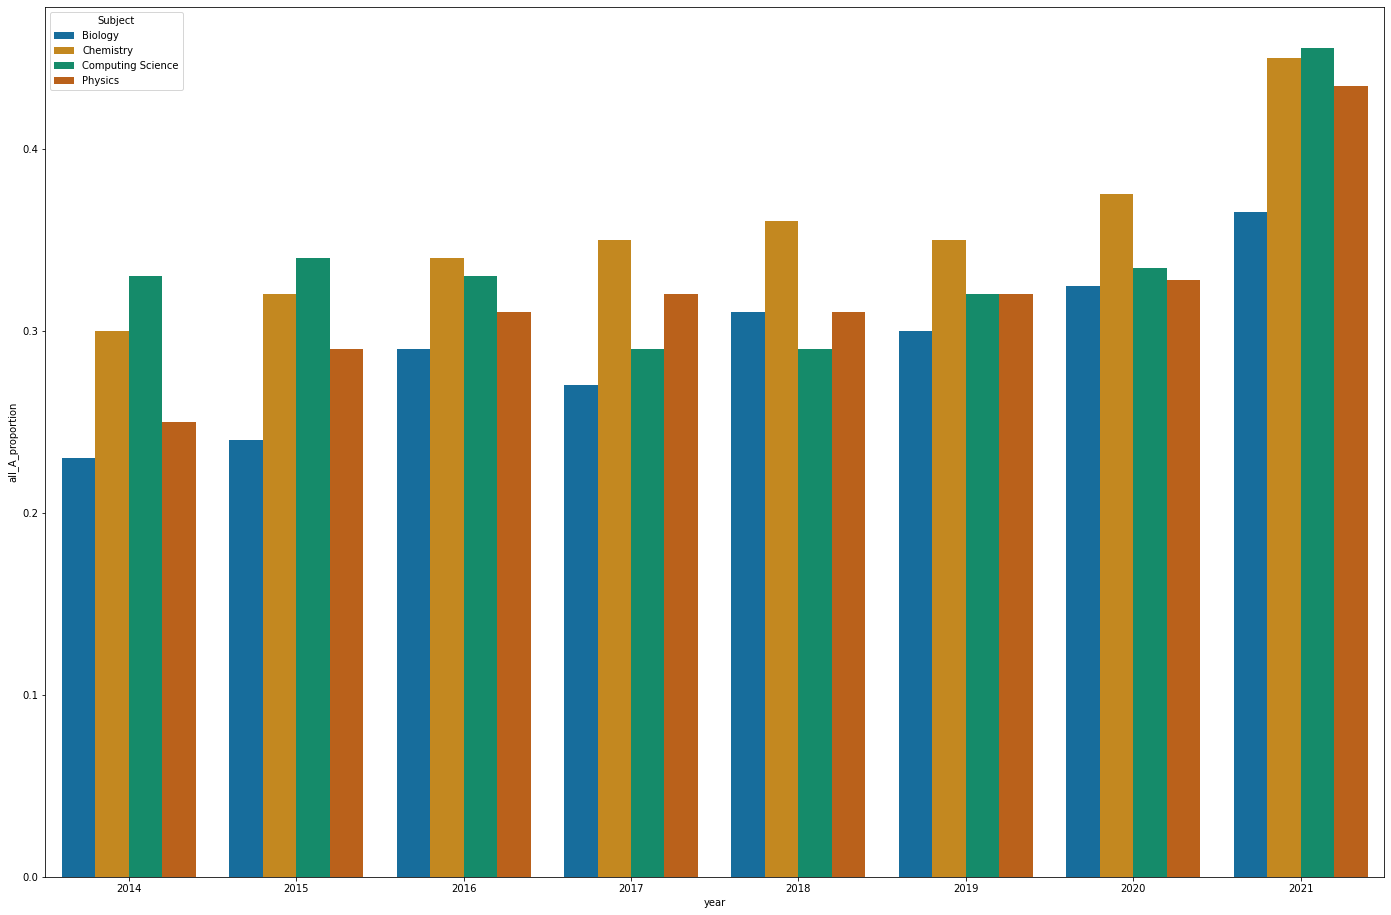

In [66]:
#proportions
fig_dims = (24, 16)
fig, ax = plt.subplots(figsize=fig_dims)
#sns.barplot(x = "names", y = "values", ax=ax, data=df)
sns.barplot(data=N5_Science.reset_index(), x="year", y='all_A_proportion', hue='Subject', palette='colorblind', ax=ax, dodge=True)

<AxesSubplot:xlabel='year', ylabel='male_A_proportion'>

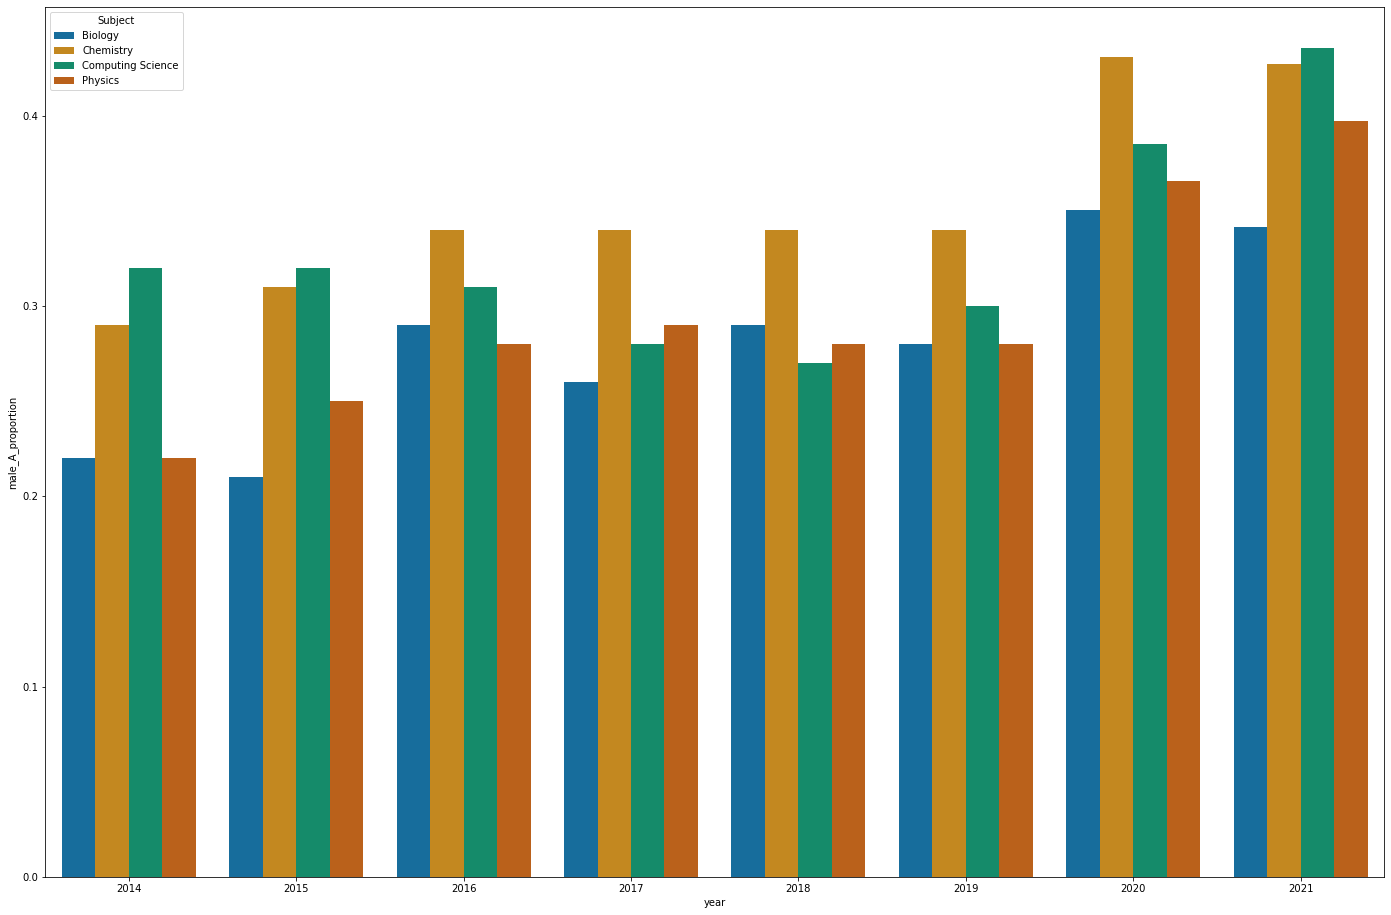

In [67]:
fig_dims = (24, 16)
fig, ax = plt.subplots(figsize=fig_dims)
#sns.barplot(x = "names", y = "values", ax=ax, data=df)
sns.barplot(data=N5_Science.reset_index(), x="year", y='male_A_proportion', hue='Subject', palette='colorblind', ax=ax, dodge=True)

<AxesSubplot:xlabel='year', ylabel='female_A_proportion'>

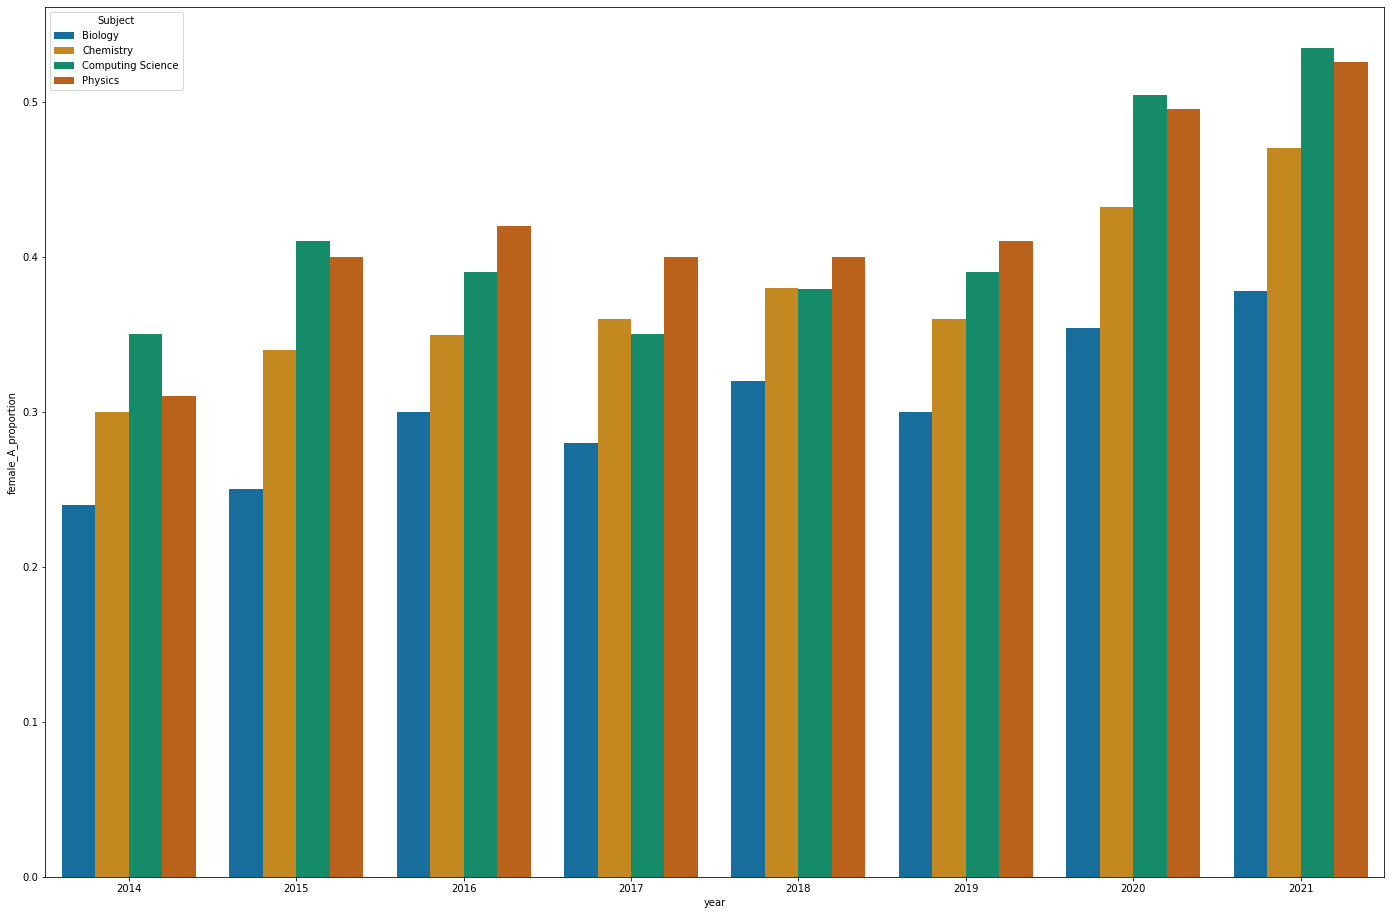

In [68]:
fig_dims = (24, 16)
fig, ax = plt.subplots(figsize=fig_dims)
#sns.barplot(x = "names", y = "values", ax=ax, data=df)
sns.barplot(data=N5_Science.reset_index(), x="year", y='female_A_proportion', hue='Subject', palette='colorblind', ax=ax, dodge=True)

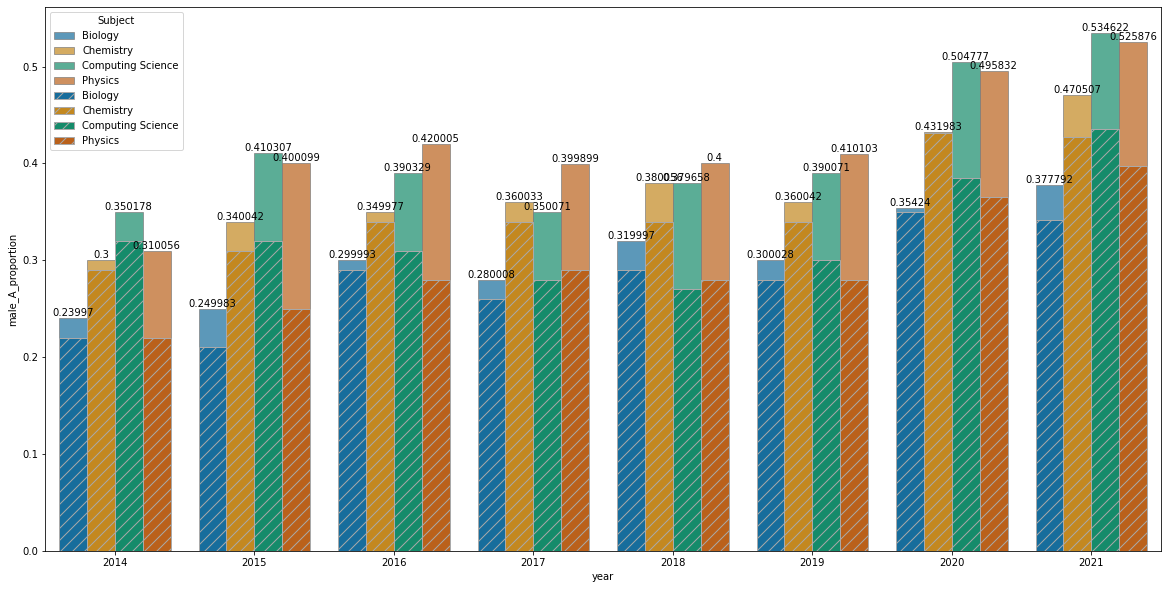

In [69]:
ig, ax = plt.subplots(figsize=(20, 10))

# plot the all users
sns.barplot(x='year', y='female_A_proportion', data=N5_Science, hue='Subject', palette='colorblind', edgecolor='grey', alpha=0.7, ax=ax)

# annotate the bars in the 3 containers (1 container per hue group)
for c in ax.containers:
    ax.bar_label(c)
    
# plot the 'male_A', which adds 3 more containers to ax
sns.barplot(x='year', y='male_A_proportion', data=N5_Science, hue='Subject', palette='colorblind', edgecolor='darkgrey', hatch='//', ax=ax)

# iterate through the last 3 new containers containing the hatched groups 
for c in ax.containers[3:]:
    
    # get the hue label, which will be used to select the data group
    hue_label = c.get_label()
    # select the data based on hue_label
    data = N5_Science.loc[N5_Science.Subject.eq(hue_label), ['female_A_proportion', 'male_A_proportion']]
    # customize the labels
    labels = [f"{v.get_height()}: {data.iloc[i, 1]:0.2f}%" for i, v in enumerate(c)]
    # add the labels
    #ax.bar_label(c, labels=labels)

plt.show()

Subject
Biology              AxesSubplot(0.125,0.125;0.775x0.755)
Chemistry            AxesSubplot(0.125,0.125;0.775x0.755)
Computing Science    AxesSubplot(0.125,0.125;0.775x0.755)
Physics              AxesSubplot(0.125,0.125;0.775x0.755)
Name: female_A_proportion, dtype: object

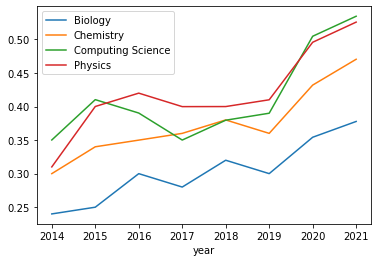

In [70]:
#subset a df
df2 = N5_Science[['year', 'female_A_proportion', 'Subject']]

df2.set_index('year', inplace=True)
df2.groupby('Subject')['female_A_proportion'].plot(legend=True)


In [109]:
#subset a df
df2 = N5_Science[['year', 'female_A_proportion', 'male_A_proportion', 'Subject']]


#df2.groupby('Subject')['female_A_proportion', 'male_A_proportion'].plot(legend=True)

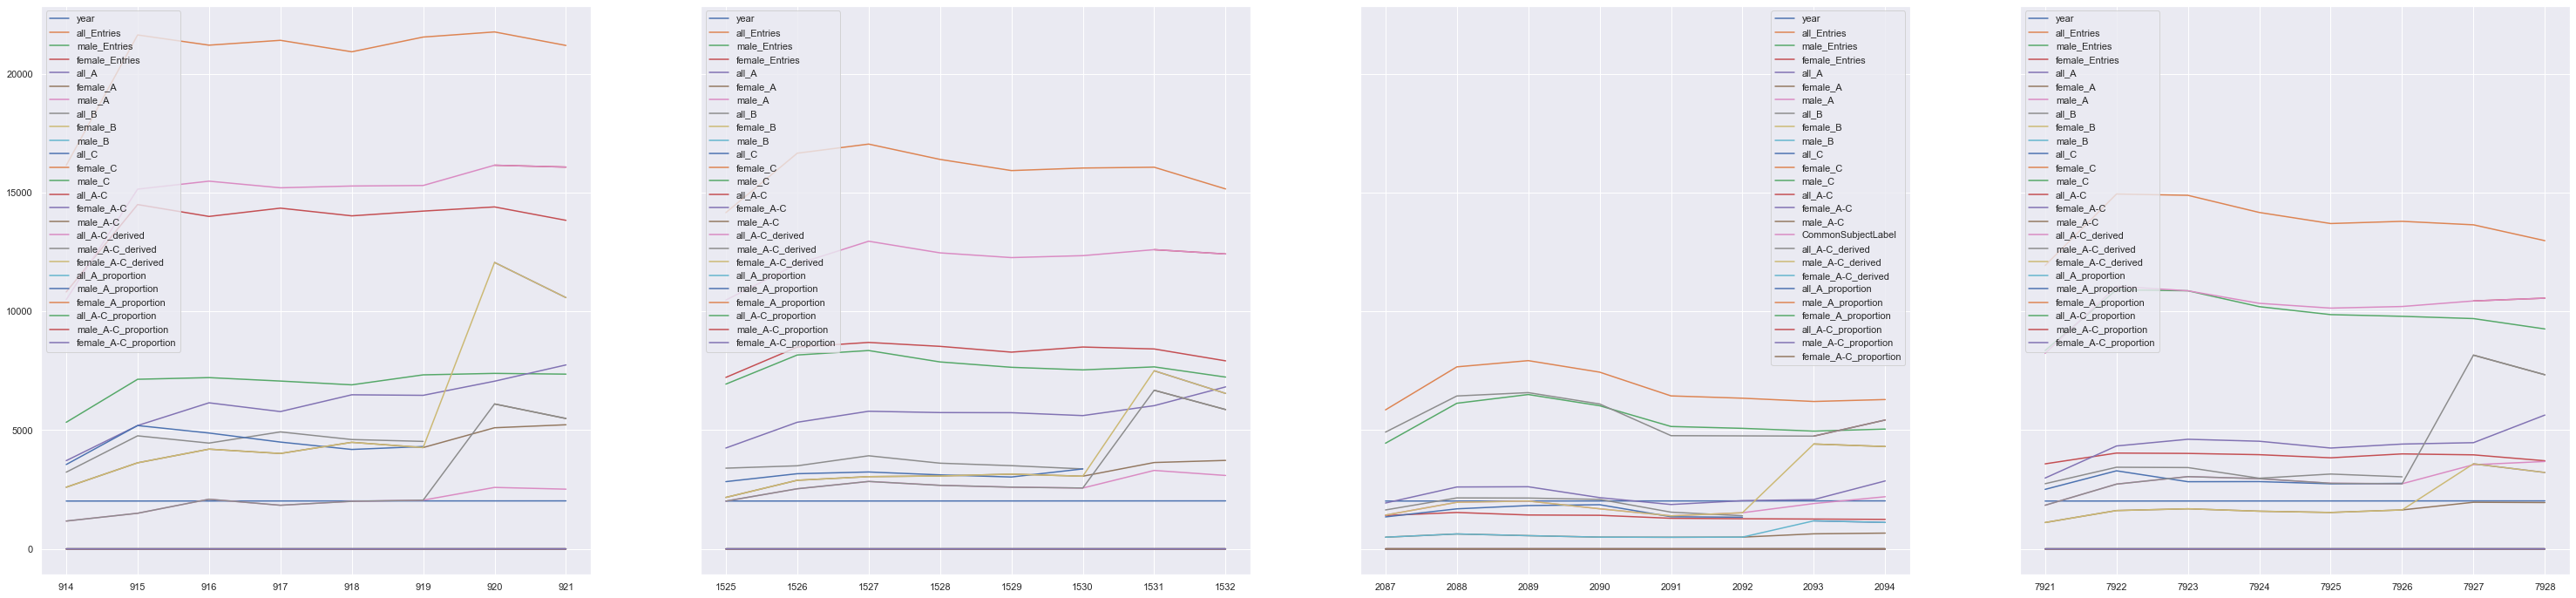

In [112]:


grouped = N5_Science.groupby('Subject')

ncols=4
nrows = int(np.ceil(grouped.ngroups/ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(52,12), sharey=True)

for (key, ax) in zip(grouped.groups.keys(), axes.flatten()):
    grouped.get_group(key).plot(ax=ax)

ax.legend()
plt.show()

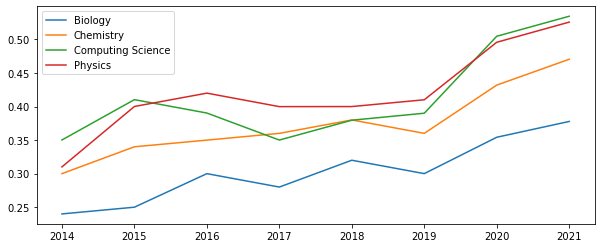

In [73]:
#subset a df
df3 = N5_Science[['year', 'female_A_proportion', 'Subject']]

fig, ax = plt.subplots(figsize=(10,4))
for key, grp in df3.groupby(['Subject']):
    ax.plot(grp['year'], grp['female_A_proportion'], label=key)

ax.legend()
#plt.show()

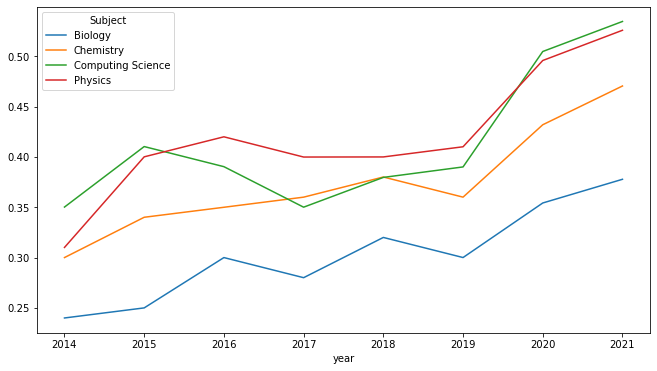

In [74]:
# reshape the long form data into a wide form
dfp = df3.pivot(index='year', columns='Subject', values='female_A_proportion')

# display(dfp.head())

# plot
ax = dfp.plot(figsize=(11, 6))

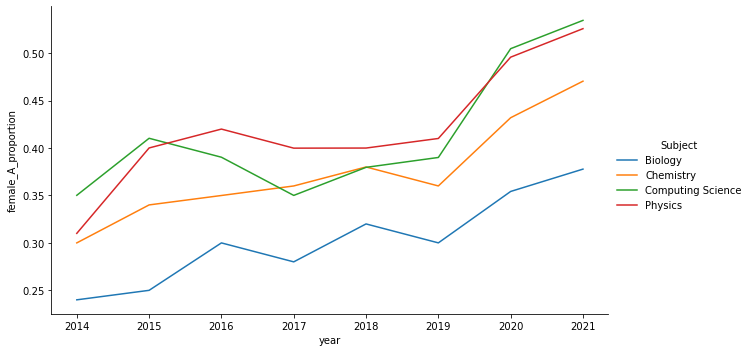

In [75]:
g = sns.relplot(kind='line', data=df3, x='year', y='female_A_proportion', hue='Subject', aspect=1.75)

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

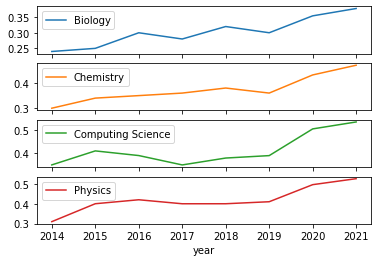

In [76]:
pd.pivot_table(df3.reset_index(),
               index='year', columns='Subject', values='female_A_proportion'
              ).plot(subplots=True)

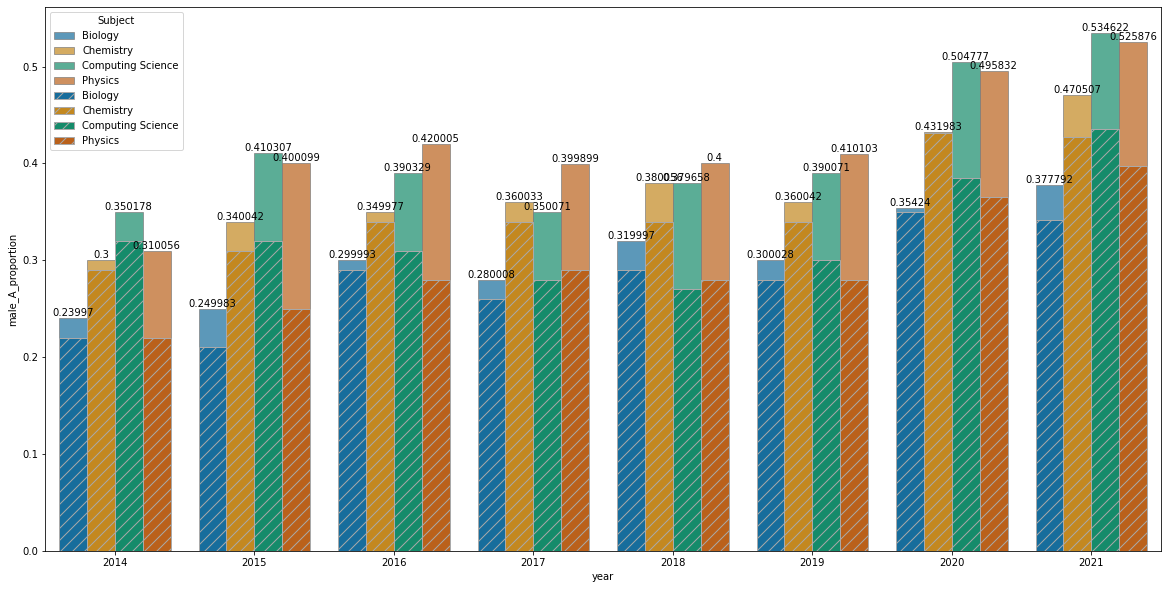

In [77]:
ig, ax = plt.subplots(figsize=(20, 10))

# plot the all users
sns.barplot(x='year', y='female_A_proportion', data=df2, hue='Subject', palette='colorblind', edgecolor='grey', alpha=0.7, ax=ax)

# annotate the bars in the 3 containers (1 container per hue group)
for c in ax.containers:
    ax.bar_label(c)
    
# plot the 'male_A', which adds 3 more containers to ax
sns.barplot(x='year', y='male_A_proportion', data=df2, hue='Subject', palette='colorblind', edgecolor='darkgrey', hatch='//', ax=ax)

# iterate through the last 3 new containers containing the hatched groups 
for c in ax.containers[3:]:
    
    # get the hue label, which will be used to select the data group
    hue_label = c.get_label()
    # select the data based on hue_label
    data = df2.loc[df2.Subject.eq(hue_label), ['female_A_proportion', 'male_A_proportion']]
    # customize the labels
    labels = [f"{v.get_height()}: {data.iloc[i, 1]:0.2f}%" for i, v in enumerate(c)]
    # add the labels
    #ax.bar_label(c, labels=labels)

plt.show()

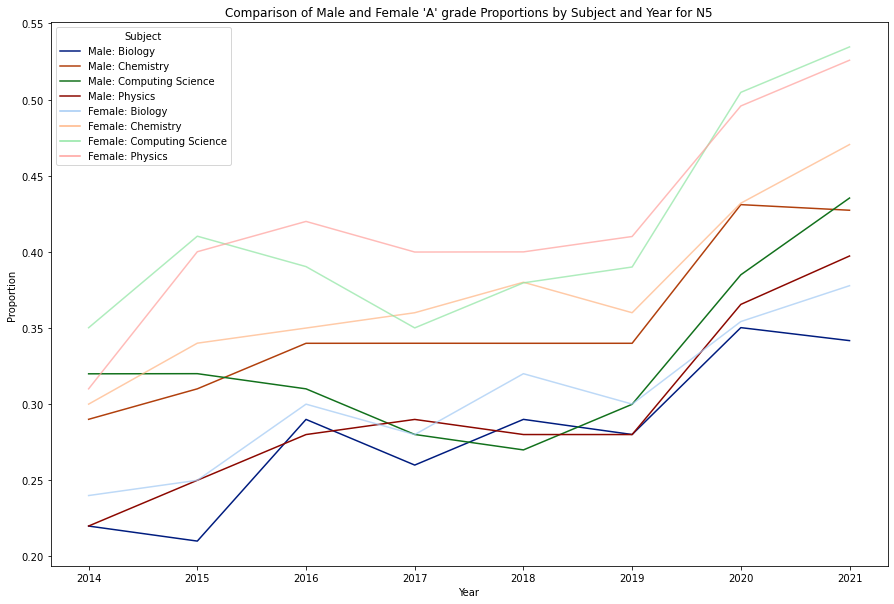

In [78]:

plt.figure(figsize=(15, 10))  # Adjust the size as needed

sns.lineplot(data=N5_Science, x='year', y='male_A_proportion', hue='Subject', palette='dark')
sns.lineplot(data=N5_Science, x='year', y='female_A_proportion', hue='Subject', palette='pastel', alpha=0.7)
plt.legend(title='Subject')
plt.title("Comparison of Male and Female 'A' grade Proportions by Subject and Year for N5")
plt.xlabel("Year")
plt.ylabel("Proportion")

# Add custom legend labels
handles, labels = plt.gca().get_legend_handles_labels()
custom_labels = []

for i, label in enumerate(labels):
    if i < len(labels) // 2:
        custom_labels.append('Male: ' + label)
    else:
        custom_labels.append('Female: ' + label)

plt.legend(handles, custom_labels, title='Subject')


plt.show()

<Figure size 864x576 with 0 Axes>

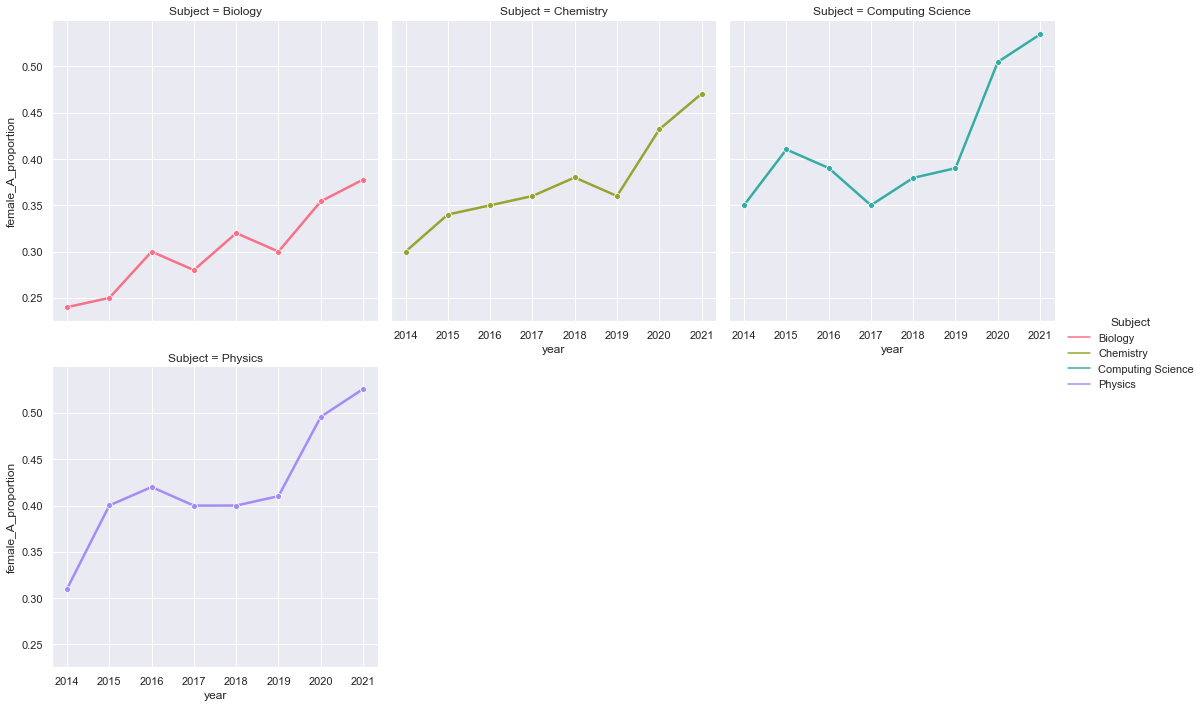

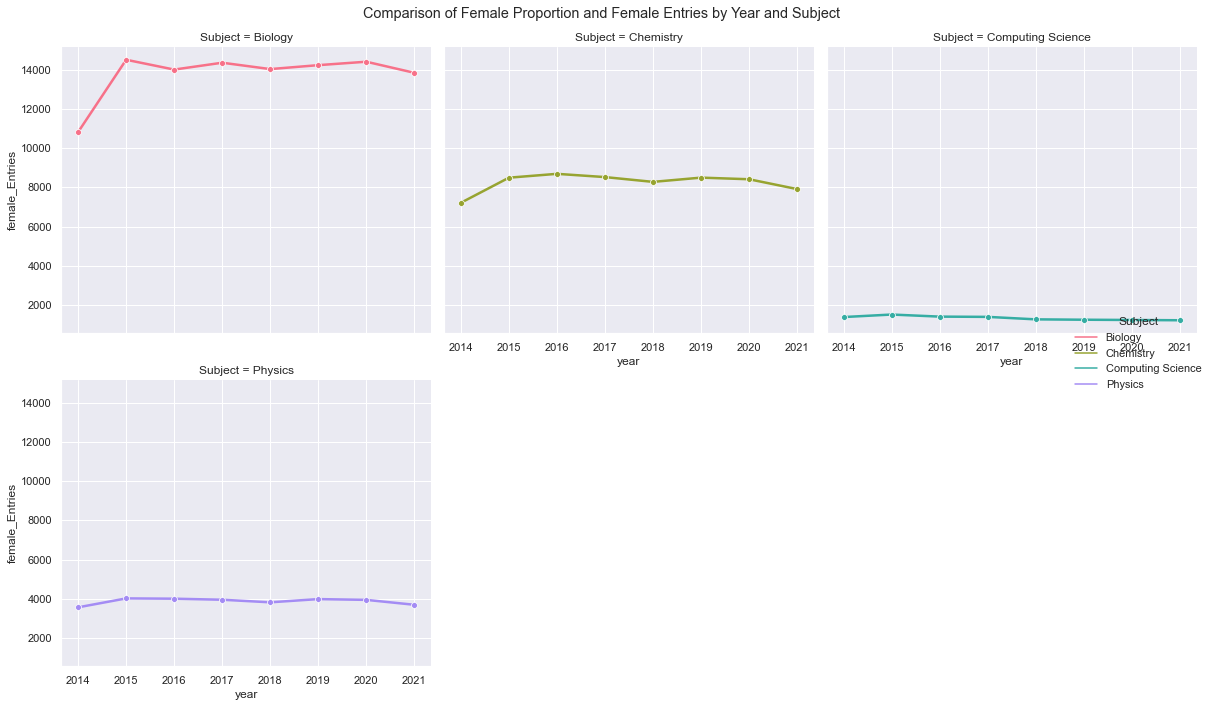

In [113]:

sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(12, 8))  # Adjust the size as needed

# Plotting 'female_A_proportion' and 'female_entries' by year and subject
sns.relplot(data=N5_Science, x='year', y='female_A_proportion', hue='Subject', col='Subject', col_wrap=3, palette='husl', linewidth=2.5, kind='line', marker='o', ci=None)
sns.relplot(data=N5_Science, x='year', y='female_Entries', hue='Subject', col='Subject', col_wrap=3, palette='husl', linewidth=2.5, kind='line', marker='o', ci=None)

plt.suptitle("Comparison of Female Proportion and Female Entries by Year and Subject")
plt.tight_layout()
plt.show()


<Figure size 864x576 with 0 Axes>

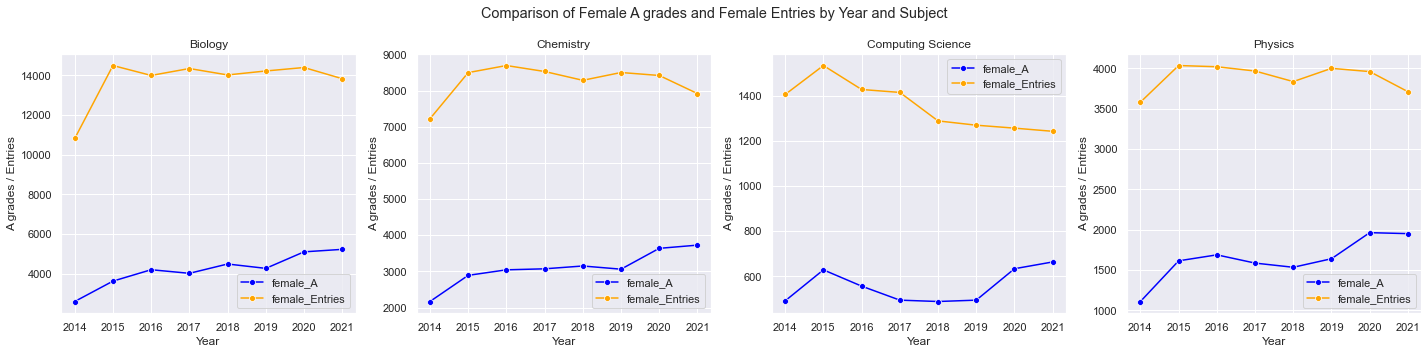

In [119]:

sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(12, 8))  # Adjust the size as needed

# Get unique subjects
subjects = N5_Science['Subject'].unique()
num_subjects = len(subjects)

# Create subplots for each subject
fig, axes = plt.subplots(nrows=1, ncols=num_subjects, figsize=(5*num_subjects, 5))

# Plot 'female_A_proportion' and 'female_entries' for each subject
for i, subject in enumerate(subjects):
    ax = axes[i]
    sns.lineplot(data=N5_Science[N5_Science['Subject'] == subject], x='year', y='female_A', ax=ax, color='blue', marker='o', label='female_A', ci=None)
    sns.lineplot(data=N5_Science[N5_Science['Subject'] == subject], x='year', y='female_Entries', ax=ax, color='orange', marker='o', label='female_Entries', ci=None)
    ax.set_title(subject)
    ax.set_xlabel('Year')
    ax.set_ylabel('A grades / Entries')
    ax.legend()

plt.suptitle("Comparison of Female A grades and Female Entries by Year and Subject")
plt.tight_layout()
plt.show()


<Figure size 864x576 with 0 Axes>

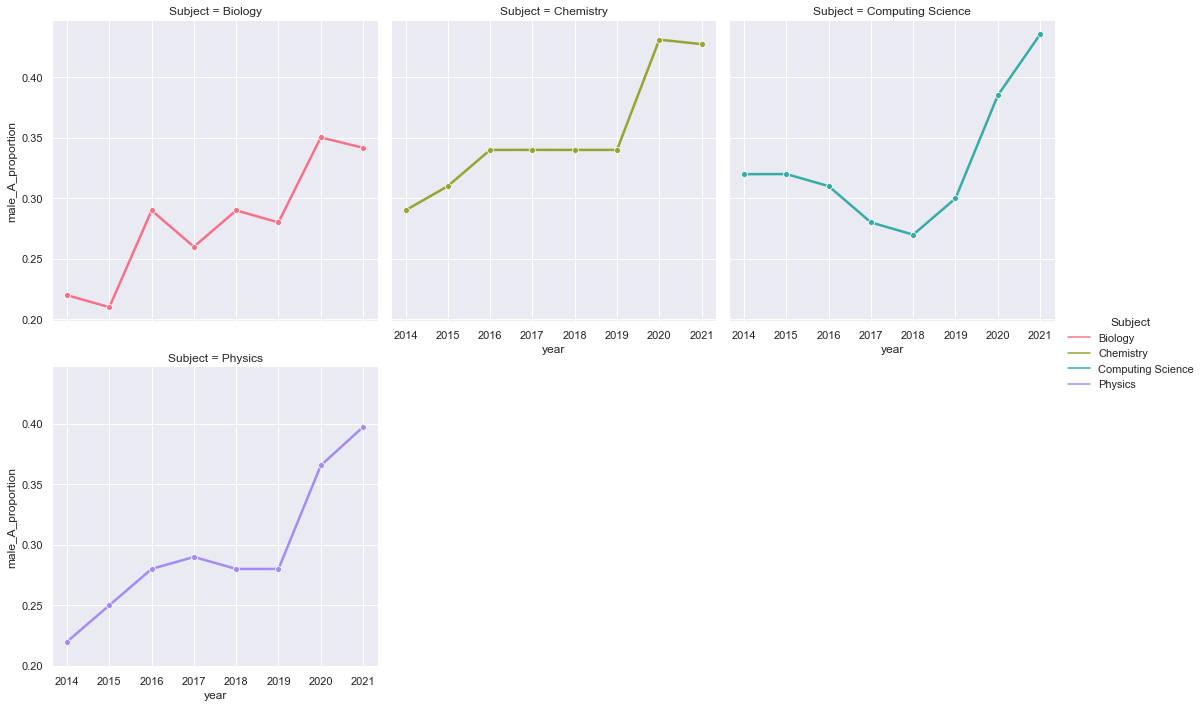

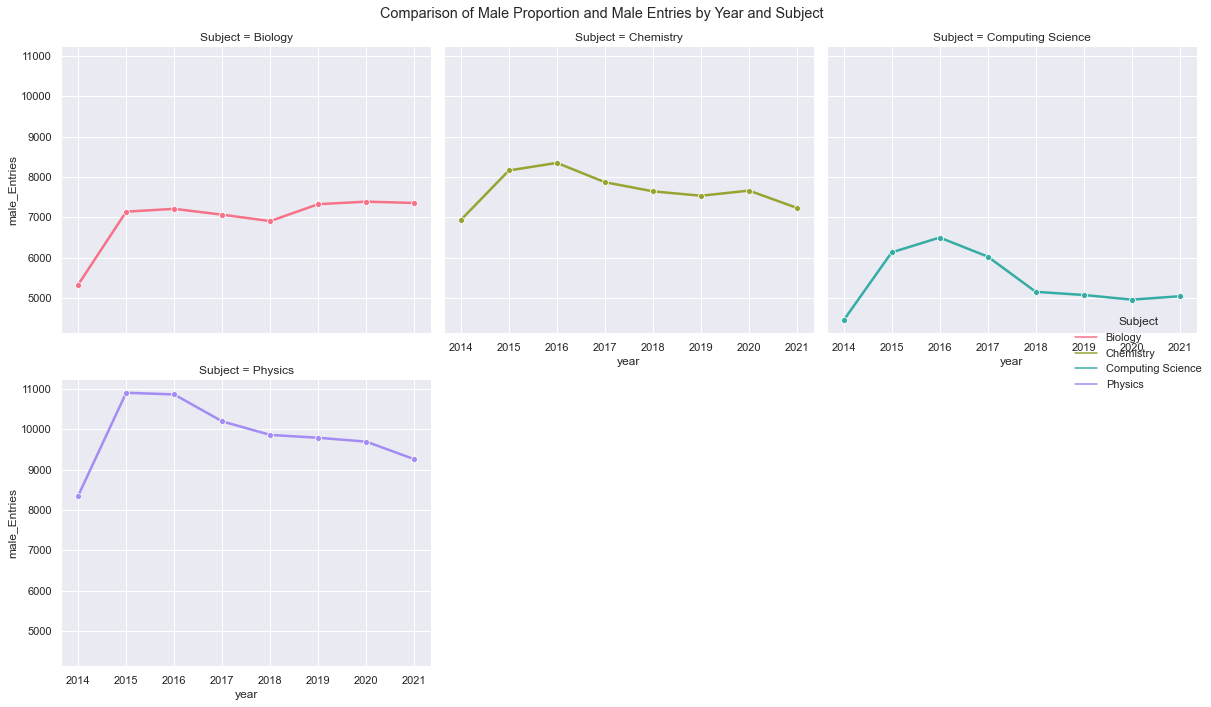

In [116]:

sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(12, 8))  # Adjust the size as needed

# Plotting 'male_A_proportion' and 'male_entries' by year and subject
sns.relplot(data=N5_Science, x='year', y='male_A_proportion', hue='Subject', col='Subject', col_wrap=3, palette='husl', linewidth=2.5, kind='line', marker='o', ci=None)
sns.relplot(data=N5_Science, x='year', y='male_Entries', hue='Subject', col='Subject', col_wrap=3, palette='husl', linewidth=2.5, kind='line', marker='o', ci=None)

plt.suptitle("Comparison of Male Proportion and Male Entries by Year and Subject")
plt.tight_layout()
plt.show()


<Figure size 864x576 with 0 Axes>

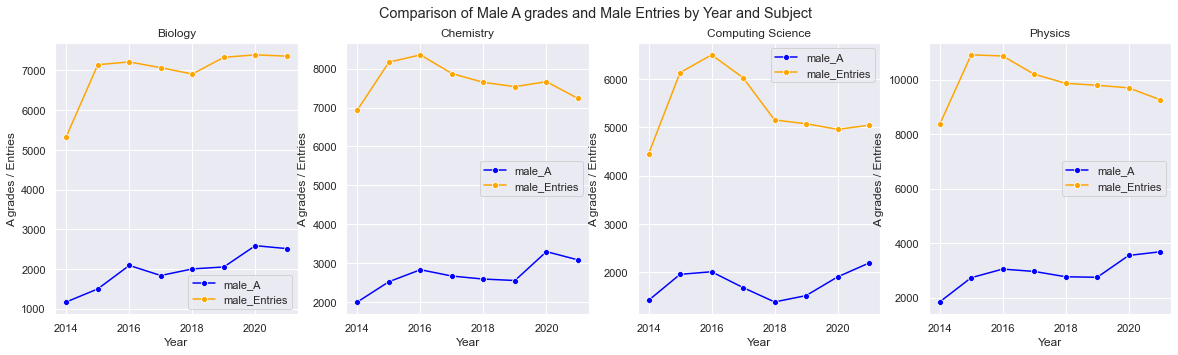

In [120]:

sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(12, 8))  # Adjust the size as needed

# Get unique subjects
subjects = N5_Science['Subject'].unique()
num_subjects = len(subjects)

# Create subplots for each subject
fig, axes = plt.subplots(nrows=1, ncols=num_subjects, figsize=(5*num_subjects, 5))

# Plot 'male_A_proportion' and 'male_entries' for each subject
for i, subject in enumerate(subjects):
    ax = axes[i]
    sns.lineplot(data=N5_Science[N5_Science['Subject'] == subject], x='year', y='male_A', ax=ax, color='blue', marker='o', label='male_A', ci=None)
    sns.lineplot(data=N5_Science[N5_Science['Subject'] == subject], x='year', y='male_Entries', ax=ax, color='orange', marker='o', label='male_Entries', ci=None)
    ax.set_title(subject)
    ax.set_xlabel('Year')
    ax.set_ylabel('A grades / Entries')
    ax.legend()

plt.suptitle("Comparison of Male A grades and Male Entries by Year and Subject")
#plt.tight_layout()
plt.show()


### Higher proportions

<AxesSubplot:xlabel='year', ylabel='all_A_proportion'>

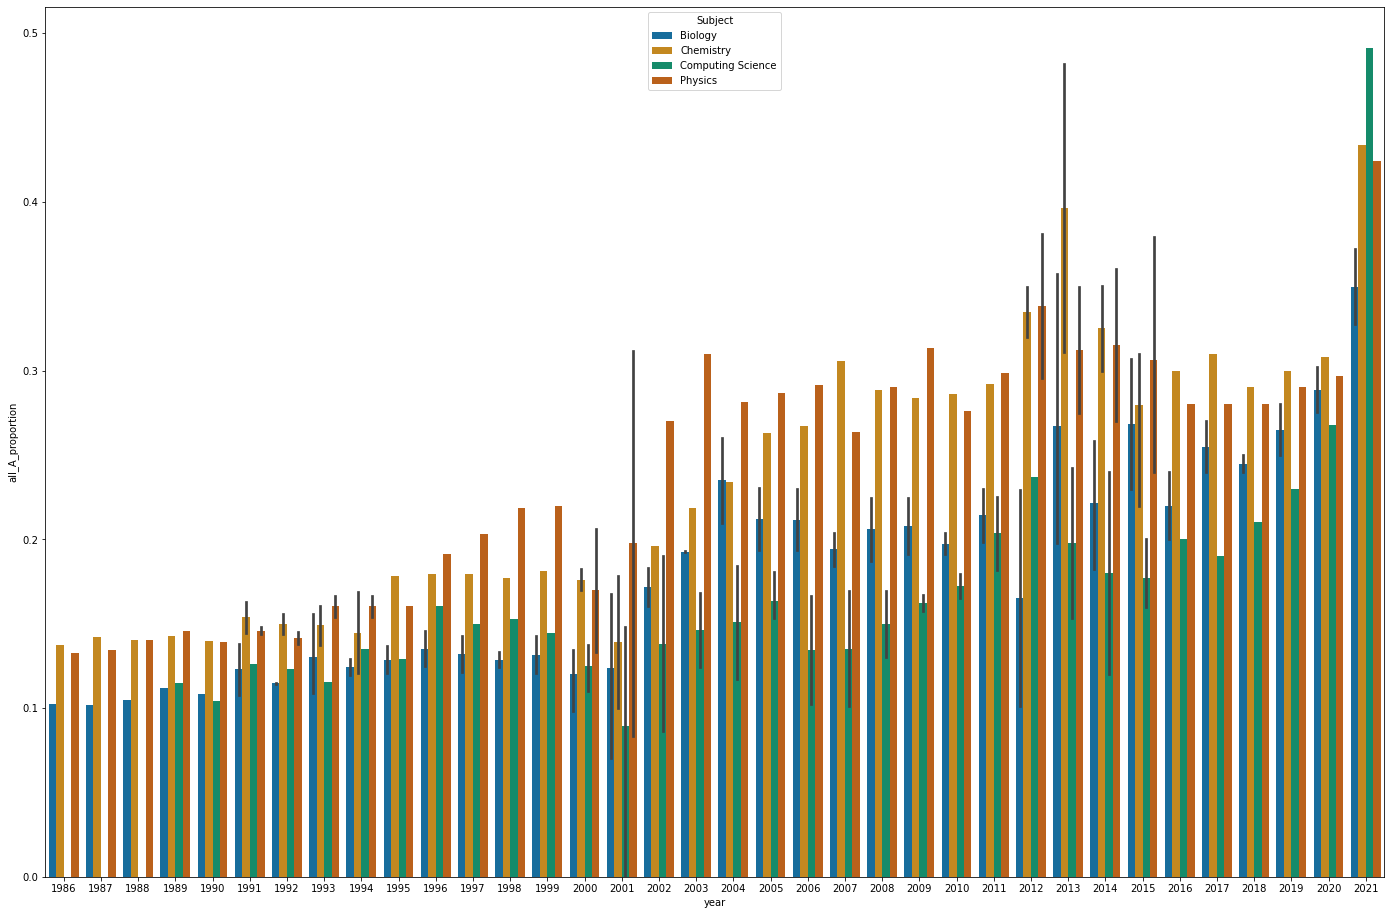

In [79]:
#proportions
fig_dims = (24, 16)
fig, ax = plt.subplots(figsize=fig_dims)
#sns.barplot(x = "names", y = "values", ax=ax, data=df)
sns.barplot(data=H_Science.reset_index(), x="year", y='all_A_proportion', hue='Subject', palette='colorblind', ax=ax, dodge=True)

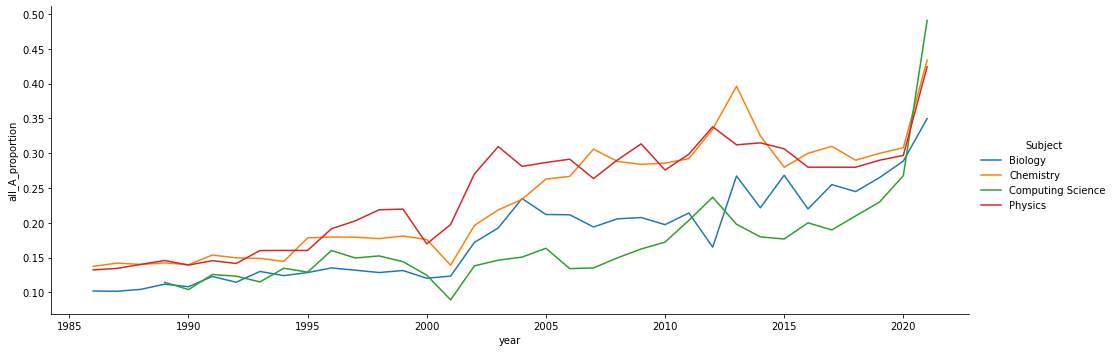

In [80]:
g = sns.relplot(kind='line', data=H_Science, x='year', y='all_A_proportion', hue='Subject', ci=None, aspect=2.75)

<AxesSubplot:xlabel='year', ylabel='male_A_proportion'>

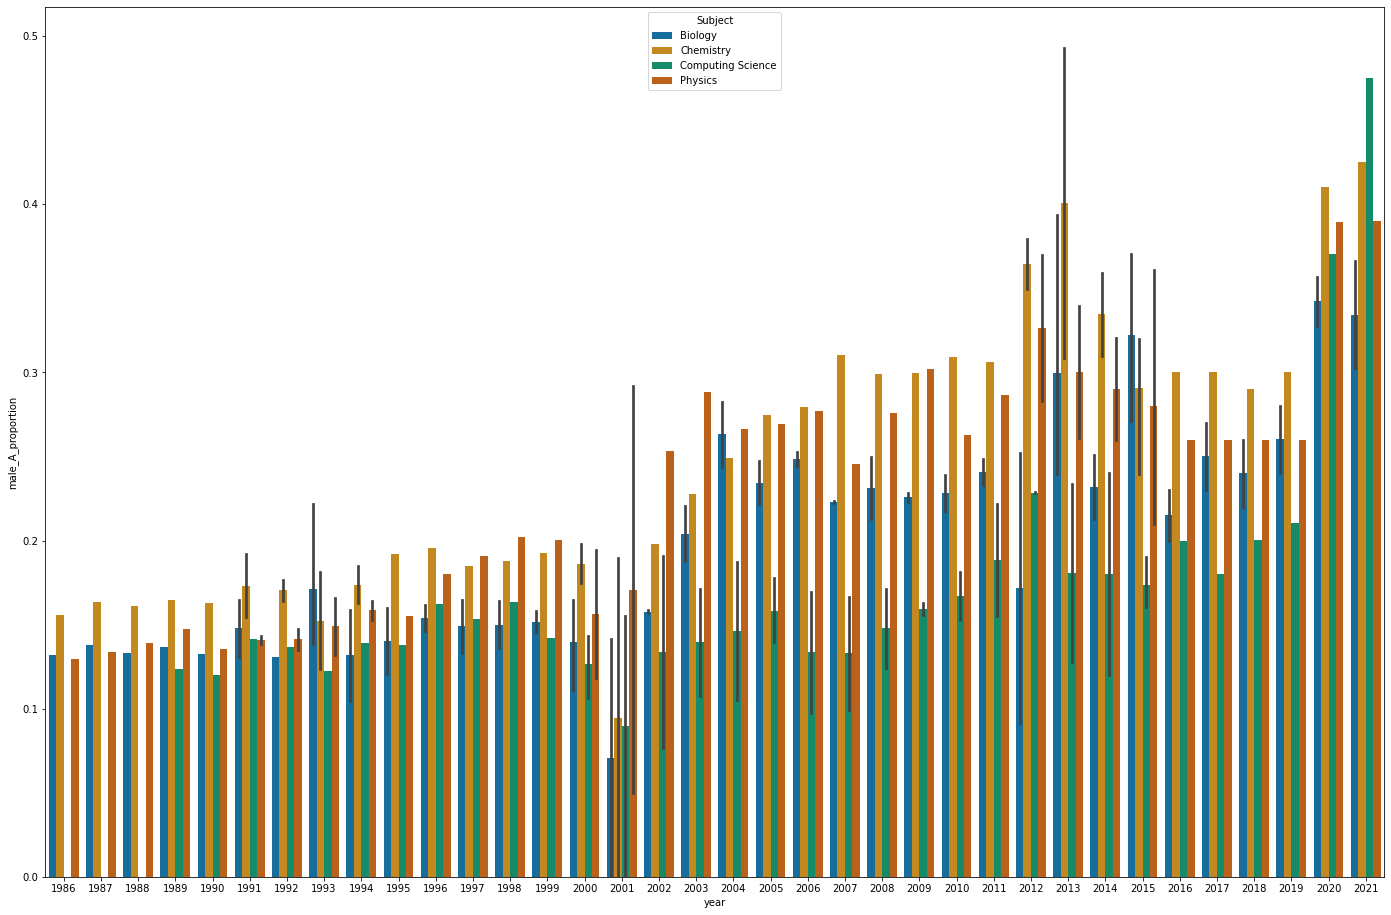

In [81]:
#proportions
fig_dims = (24, 16)
fig, ax = plt.subplots(figsize=fig_dims)
#sns.barplot(x = "names", y = "values", ax=ax, data=df)
sns.barplot(data=H_Science.reset_index(), x="year", y='male_A_proportion', hue='Subject', palette='colorblind', ax=ax, dodge=True)

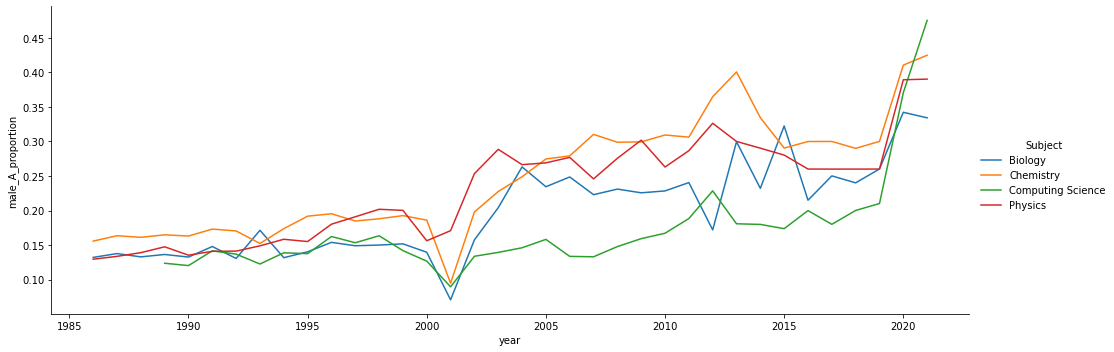

In [82]:
g = sns.relplot(kind='line', data=H_Science, x='year', y='male_A_proportion', hue='Subject', ci=None, aspect=2.75)

<AxesSubplot:xlabel='year', ylabel='female_A_proportion'>

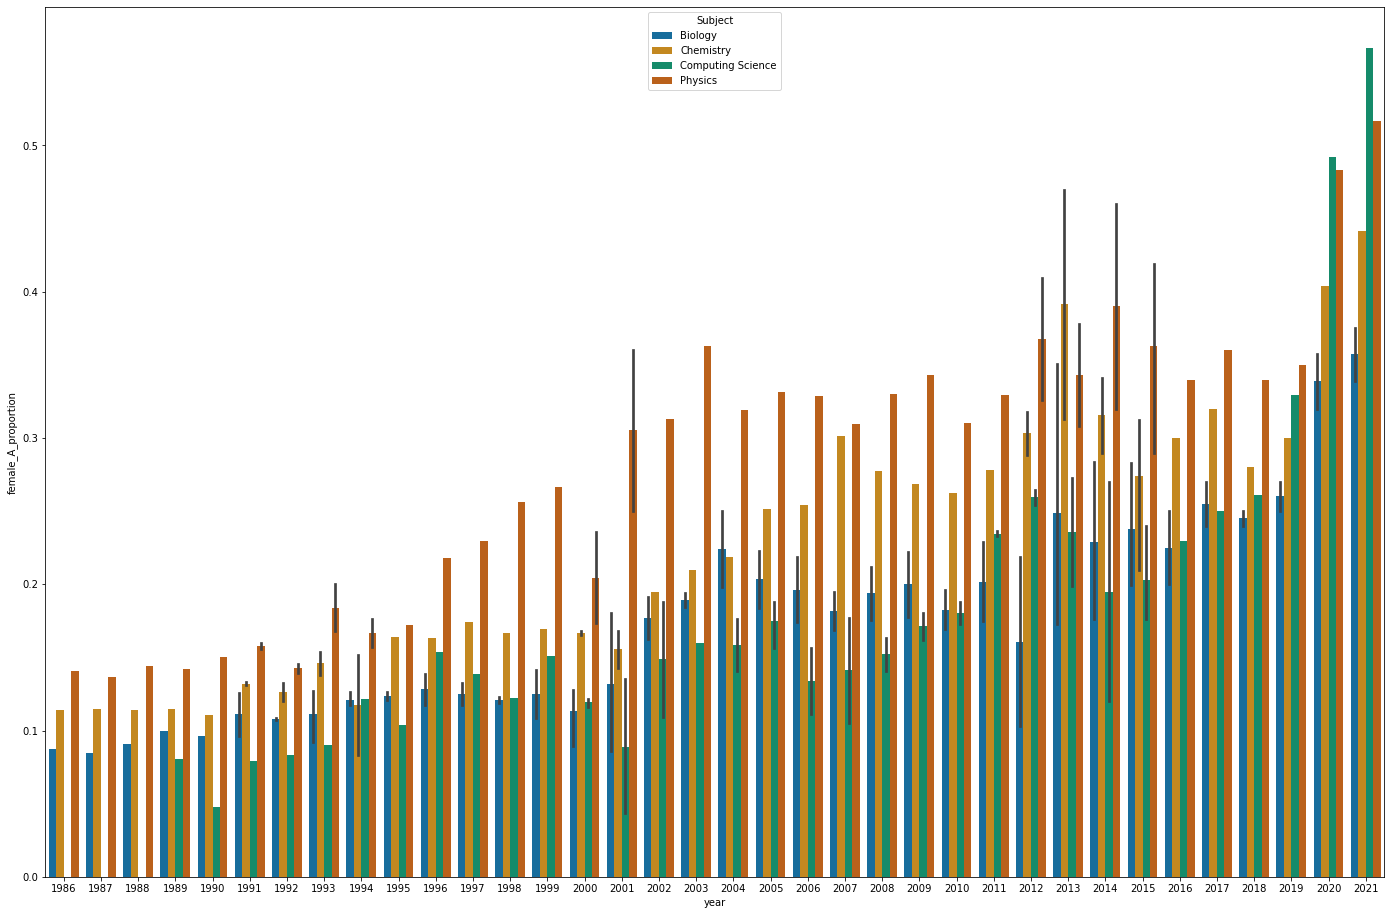

In [83]:
#proportions
fig_dims = (24, 16)
fig, ax = plt.subplots(figsize=fig_dims)
#sns.barplot(x = "names", y = "values", ax=ax, data=df)
sns.barplot(data=H_Science.reset_index(), x="year", y='female_A_proportion', hue='Subject', palette='colorblind', ax=ax, dodge=True)

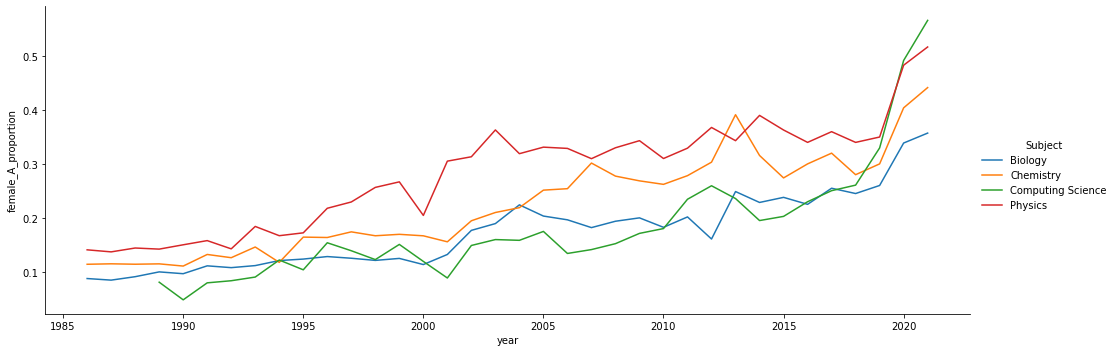

In [84]:
g = sns.relplot(kind='line', data=H_Science, x='year', y='female_A_proportion', hue='Subject', ci=None, aspect=2.75)

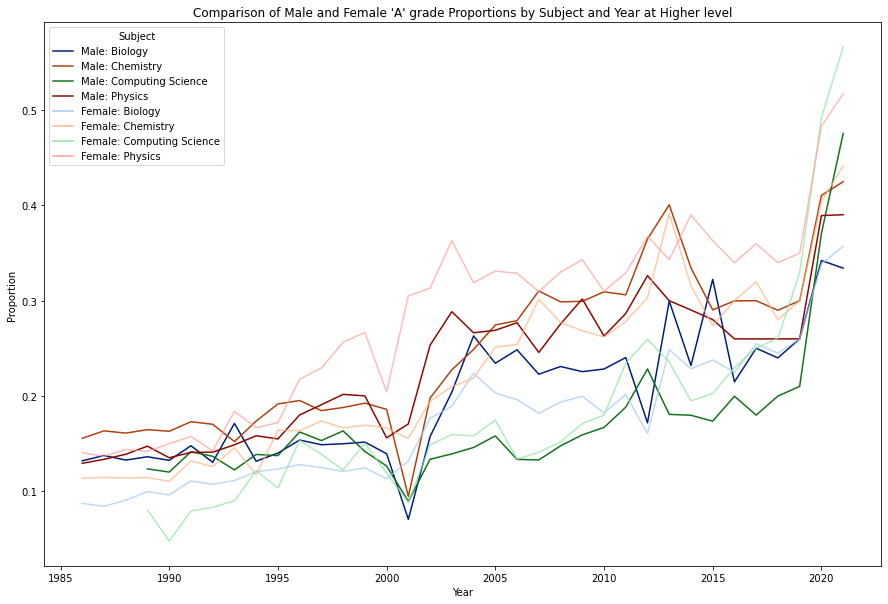

In [85]:

plt.figure(figsize=(15, 10))  # Adjust the size as needed

sns.lineplot(data=H_Science, x='year', y='male_A_proportion', hue='Subject', palette='dark', ci=None)
sns.lineplot(data=H_Science, x='year', y='female_A_proportion', hue='Subject', palette='pastel', ci=None, alpha=0.7)
plt.legend(title='Subject')
plt.title("Comparison of Male and Female 'A' grade Proportions by Subject and Year at Higher level")
plt.xlabel("Year")
plt.ylabel("Proportion")

# Add custom legend labels
handles, labels = plt.gca().get_legend_handles_labels()
custom_labels = []

for i, label in enumerate(labels):
    if i < len(labels) // 2:
        custom_labels.append('Male: ' + label)
    else:
        custom_labels.append('Female: ' + label)

plt.legend(handles, custom_labels, title='Subject')


plt.show()

<Figure size 864x576 with 0 Axes>

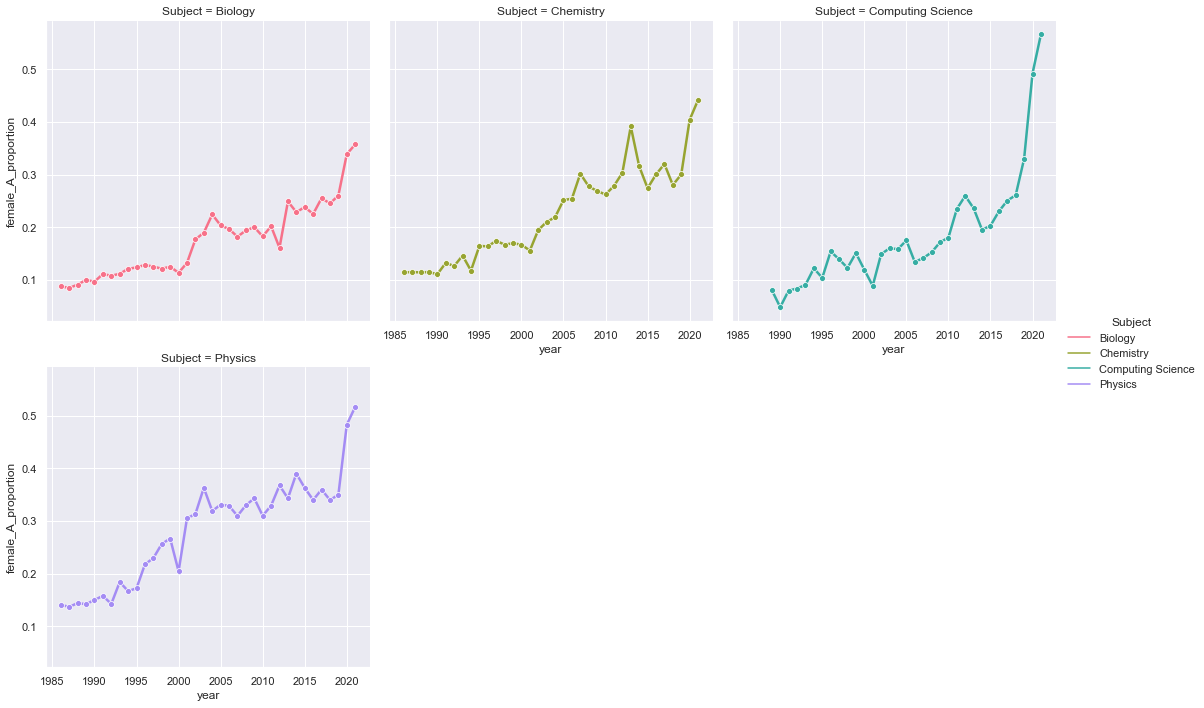

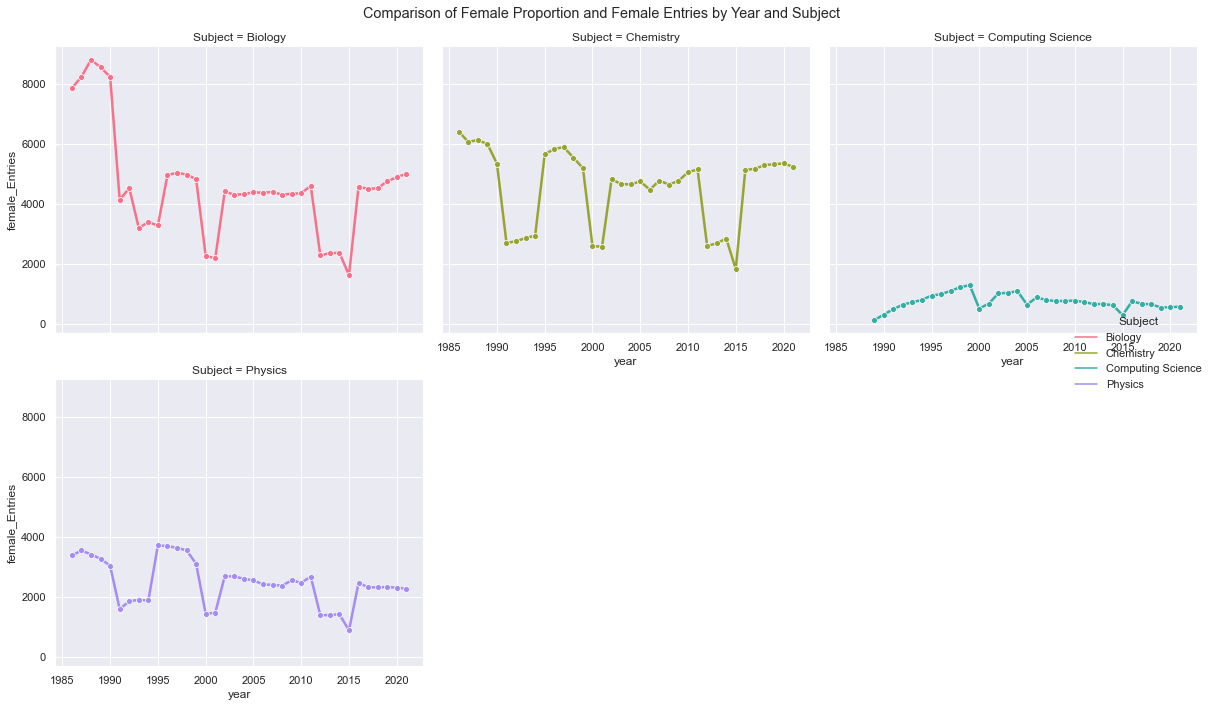

In [86]:

sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(12, 8))  # Adjust the size as needed

# Plotting 'female_A_proportion' and 'female_entries' by year and subject
sns.relplot(data=H_Science, x='year', y='female_A_proportion', hue='Subject', col='Subject', col_wrap=3, palette='husl', linewidth=2.5, kind='line', marker='o', ci=None)
sns.relplot(data=H_Science, x='year', y='female_Entries', hue='Subject', col='Subject', col_wrap=3, palette='husl', linewidth=2.5, kind='line', marker='o', ci=None)

plt.suptitle("Comparison of Female Proportion and Female Entries by Year and Subject")
plt.tight_layout()
plt.show()


<Figure size 864x576 with 0 Axes>

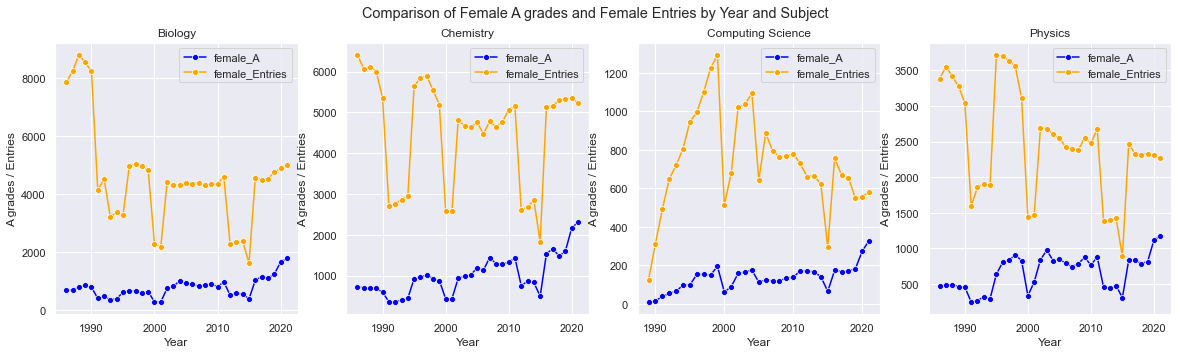

In [121]:

sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(12, 8))  # Adjust the size as needed

# Get unique subjects
subjects = H_Science['Subject'].unique()
num_subjects = len(subjects)

# Create subplots for each subject
fig, axes = plt.subplots(nrows=1, ncols=num_subjects, figsize=(5*num_subjects, 5))

# Plot 'female_A_proportion' and 'female_entries' for each subject
for i, subject in enumerate(subjects):
    ax = axes[i]
    sns.lineplot(data=H_Science[H_Science['Subject'] == subject], x='year', y='female_A', ax=ax, color='blue', marker='o', label='female_A', ci=None)
    sns.lineplot(data=H_Science[H_Science['Subject'] == subject], x='year', y='female_Entries', ax=ax, color='orange', marker='o', label='female_Entries', ci=None)
    ax.set_title(subject)
    ax.set_xlabel('Year')
    ax.set_ylabel('A grades / Entries')
    ax.legend()

plt.suptitle("Comparison of Female A grades and Female Entries by Year and Subject")
#plt.tight_layout()
plt.show()


<Figure size 864x576 with 0 Axes>

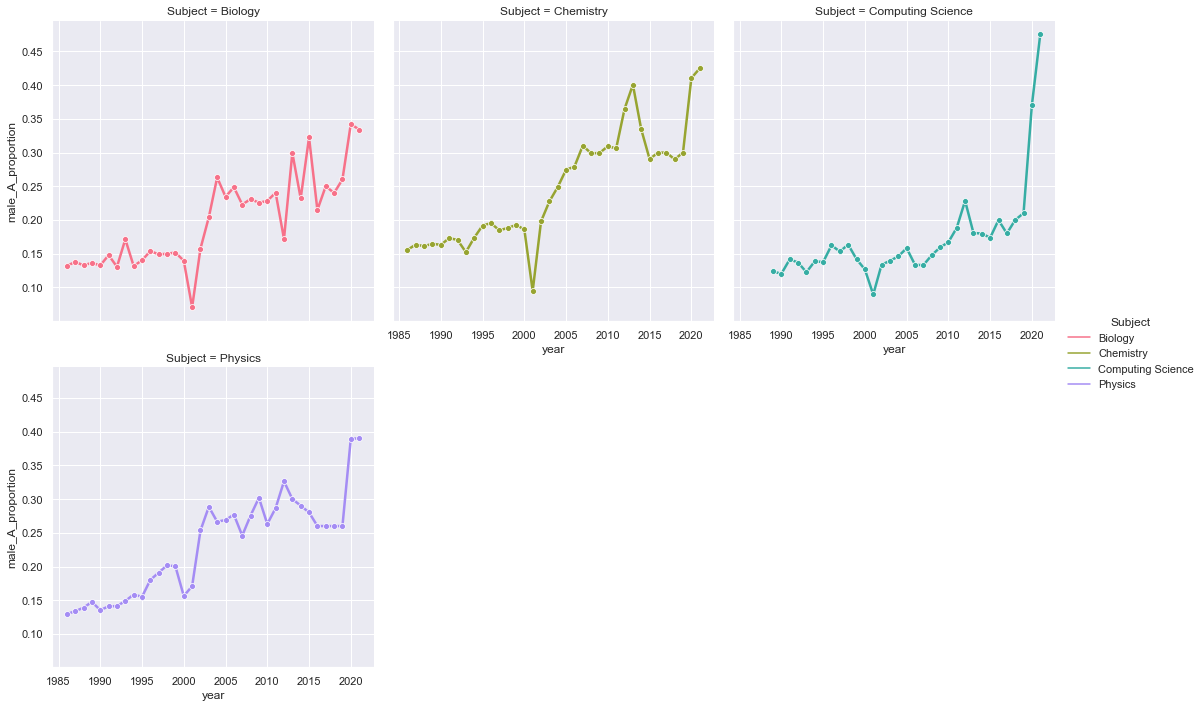

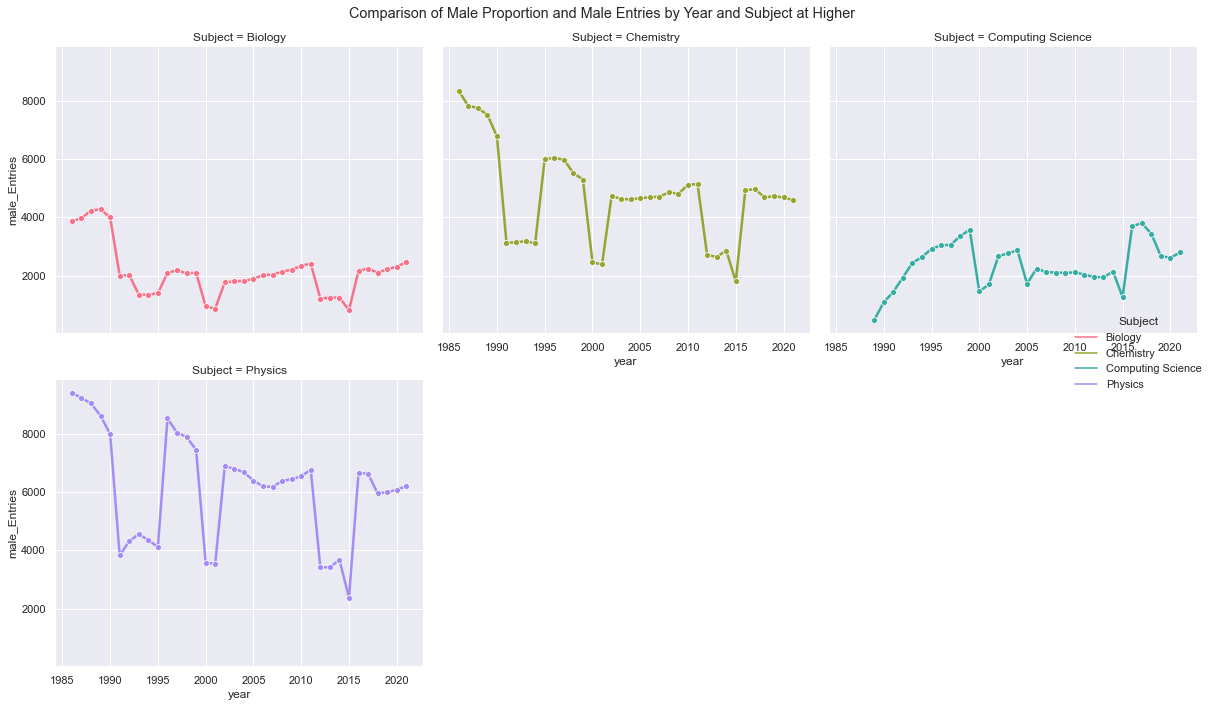

In [108]:

sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(12, 8))  # Adjust the size as needed

# Plotting 'female_A_proportion' and 'female_entries' by year and subject
sns.relplot(data=H_Science, x='year', y='male_A_proportion', hue='Subject', col='Subject', col_wrap=3, palette='husl', linewidth=2.5, kind='line', marker='o', ci=None)
sns.relplot(data=H_Science, x='year', y='male_Entries', hue='Subject', col='Subject', col_wrap=3, palette='husl', linewidth=2.5, kind='line', marker='o', ci=None)

plt.suptitle("Comparison of Male Proportion and Male Entries by Year and Subject at Higher")
plt.tight_layout()
plt.show()


<Figure size 864x576 with 0 Axes>

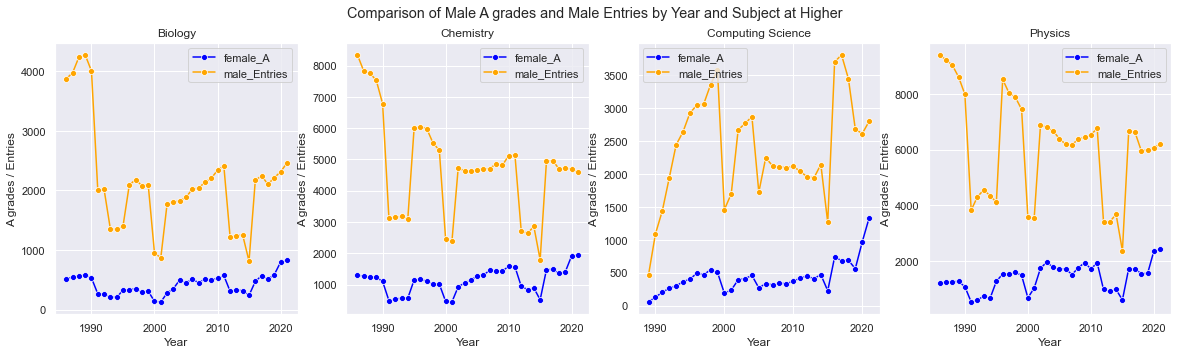

In [126]:

sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(12, 8))  # Adjust the size as needed

# Get unique subjects
subjects = H_Science['Subject'].unique()
num_subjects = len(subjects)

# Create subplots for each subject
fig, axes = plt.subplots(nrows=1, ncols=num_subjects, figsize=(5*num_subjects, 5))

# Plot 'female_A_proportion' and 'female_entries' for each subject
for i, subject in enumerate(subjects):
    ax = axes[i]
    sns.lineplot(data=H_Science[H_Science['Subject'] == subject], x='year', y='male_A', ax=ax, color='blue', marker='o', label='female_A', ci=None)
    sns.lineplot(data=H_Science[H_Science['Subject'] == subject], x='year', y='male_Entries', ax=ax, color='orange', marker='o', label='male_Entries', ci=None)
    ax.set_title(subject)
    ax.set_xlabel('Year')
    ax.set_ylabel('A grades / Entries')
    ax.legend()

plt.suptitle("Comparison of Male A grades and Male Entries by Year and Subject at Higher")
#plt.tight_layout()
plt.show()


### Advance Higher

<AxesSubplot:xlabel='year', ylabel='all_A_proportion'>

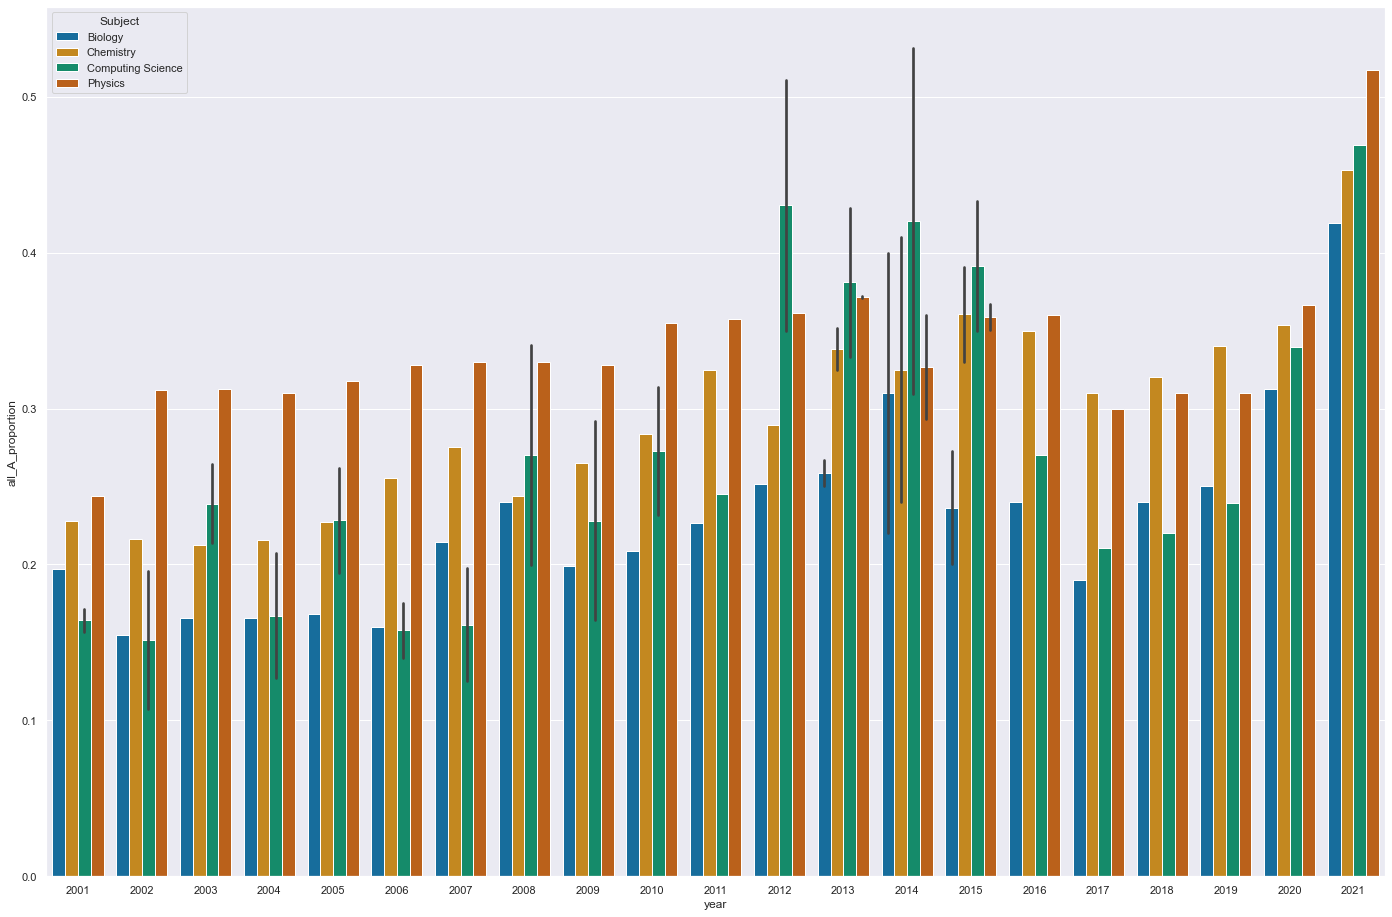

In [90]:
#proportions
fig_dims = (24, 16)
fig, ax = plt.subplots(figsize=fig_dims)
#sns.barplot(x = "names", y = "values", ax=ax, data=df)
sns.barplot(data=AH_Science.reset_index(), x="year", y='all_A_proportion', hue='Subject', palette='colorblind', ax=ax, dodge=True)

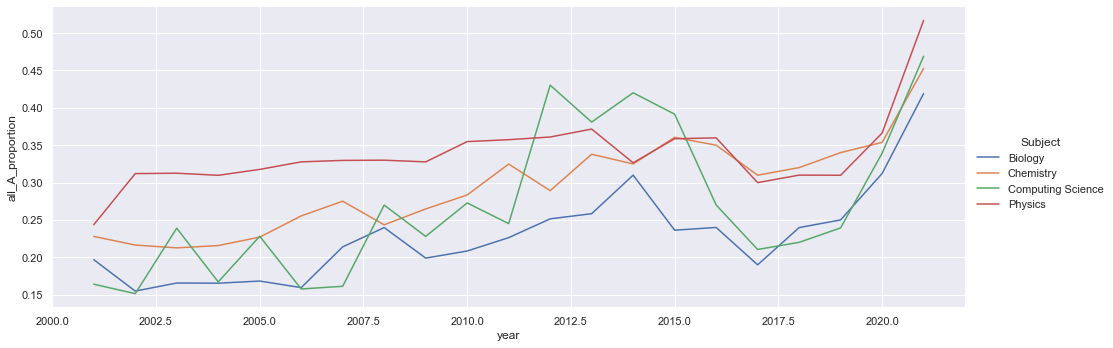

In [123]:
g = sns.relplot(kind='line', data=AH_Science, x='year', y='all_A_proportion', hue='Subject', ci=None, aspect=2.75)

<AxesSubplot:xlabel='year', ylabel='female_A_proportion'>

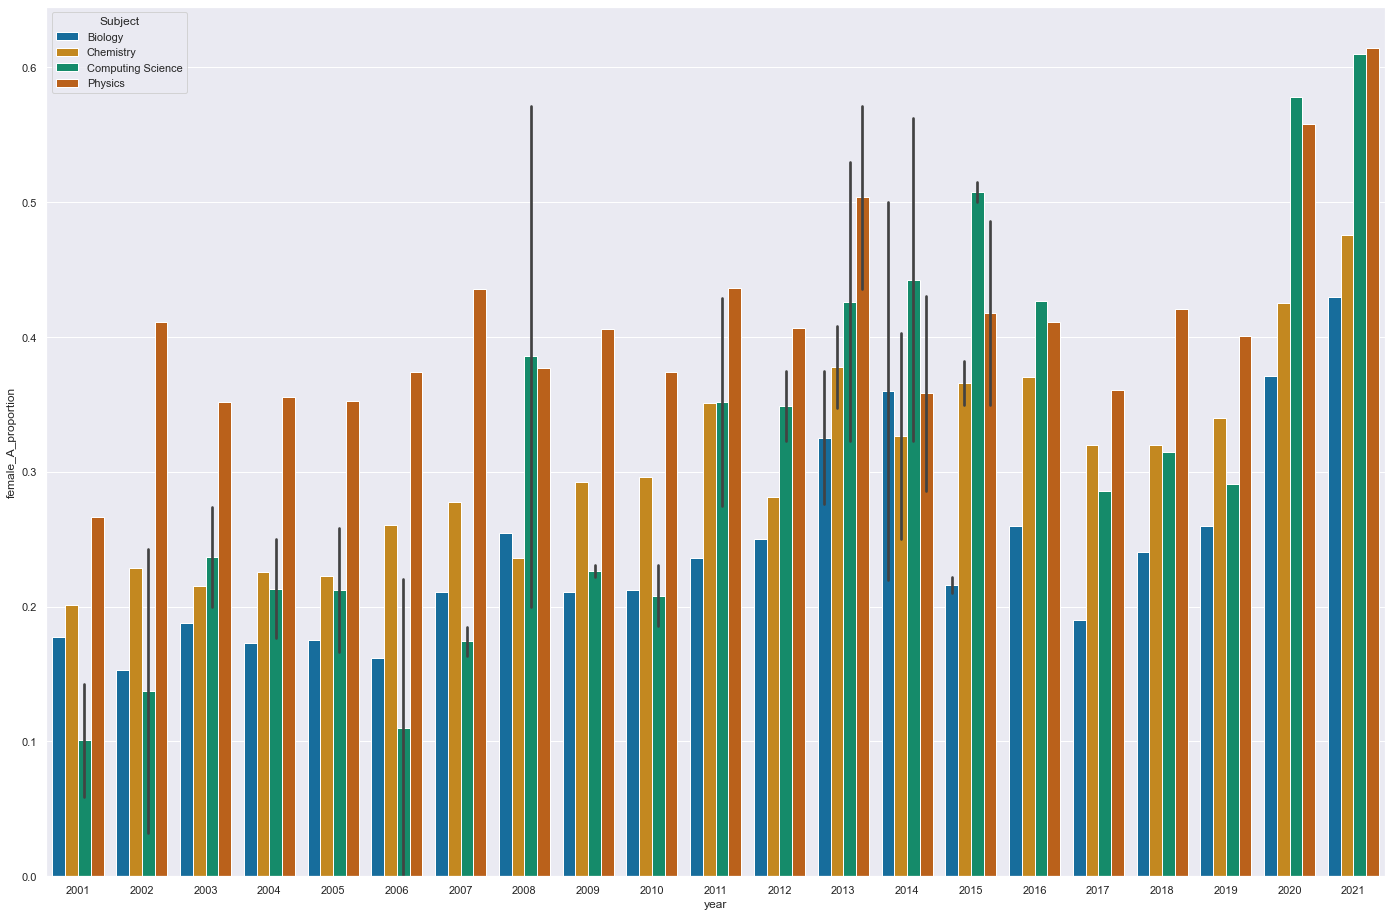

In [92]:
#proportions
fig_dims = (24, 16)
fig, ax = plt.subplots(figsize=fig_dims)
#sns.barplot(x = "names", y = "values", ax=ax, data=df)
sns.barplot(data=AH_Science.reset_index(), x="year", y='female_A_proportion', hue='Subject', palette='colorblind', ax=ax, dodge=True)

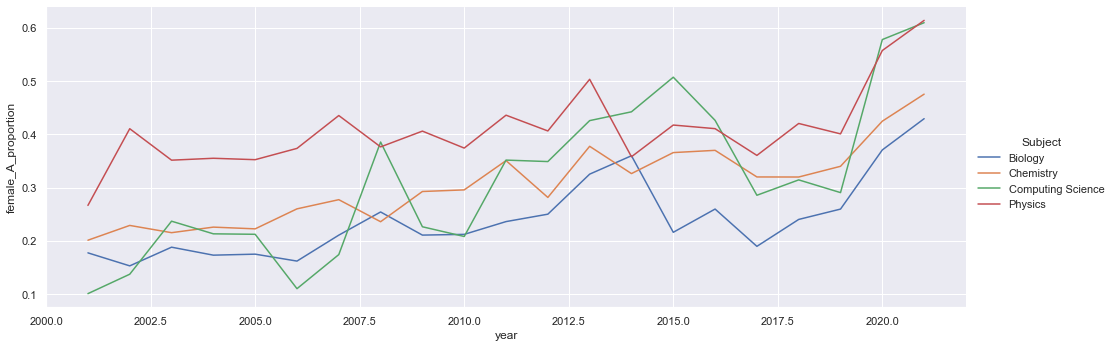

In [107]:
g = sns.relplot(kind='line', data=AH_Science, x='year', y='female_A_proportion', hue='Subject', ci=None, aspect=2.75)

<AxesSubplot:xlabel='year', ylabel='male_A_proportion'>

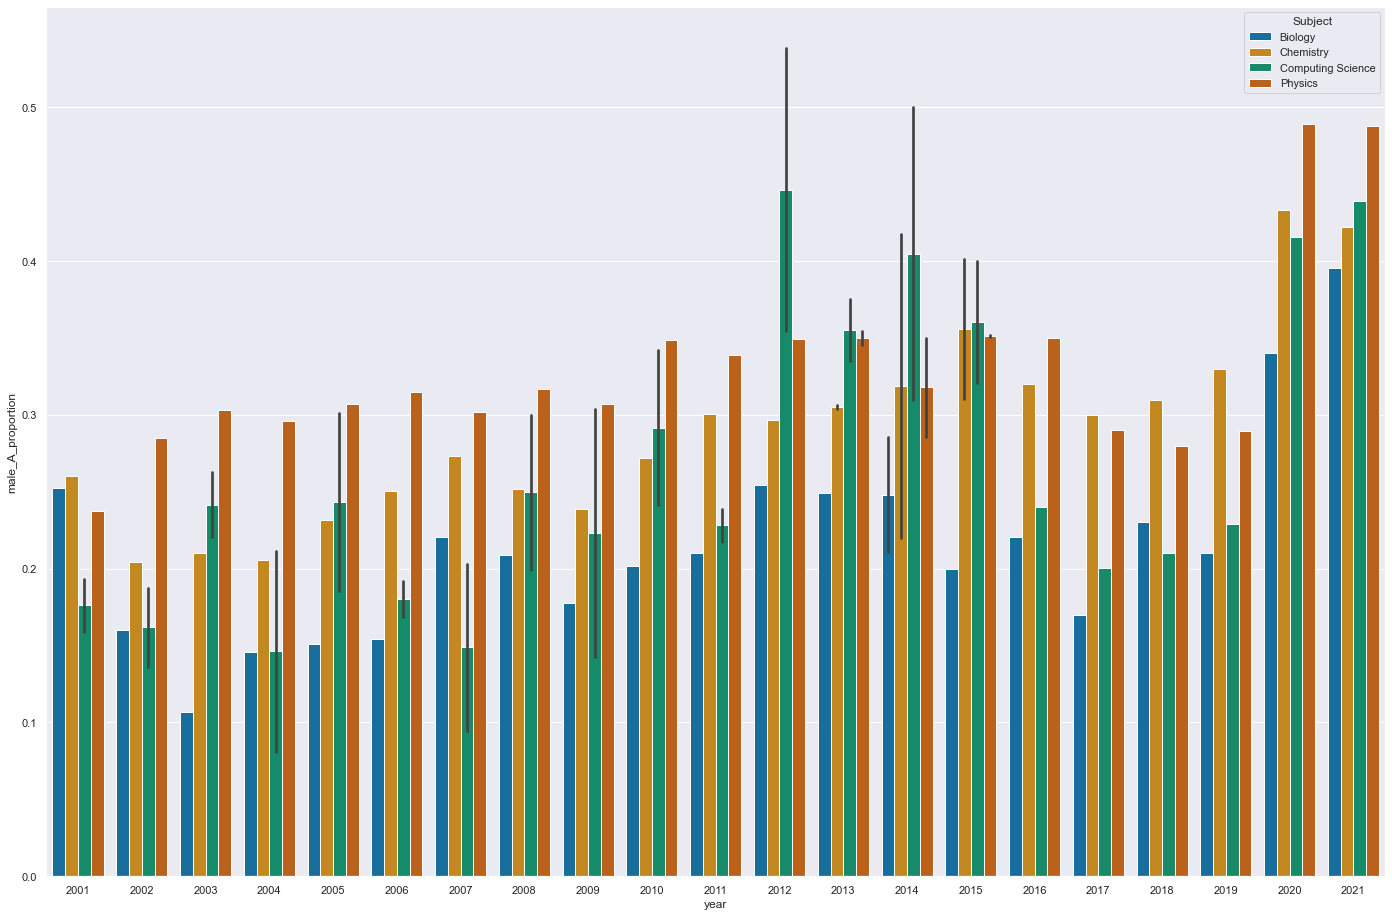

In [94]:
#proportions
fig_dims = (24, 16)
fig, ax = plt.subplots(figsize=fig_dims)
#sns.barplot(x = "names", y = "values", ax=ax, data=df)
sns.barplot(data=AH_Science.reset_index(), x="year", y='male_A_proportion', hue='Subject', palette='colorblind', ax=ax, dodge=True)

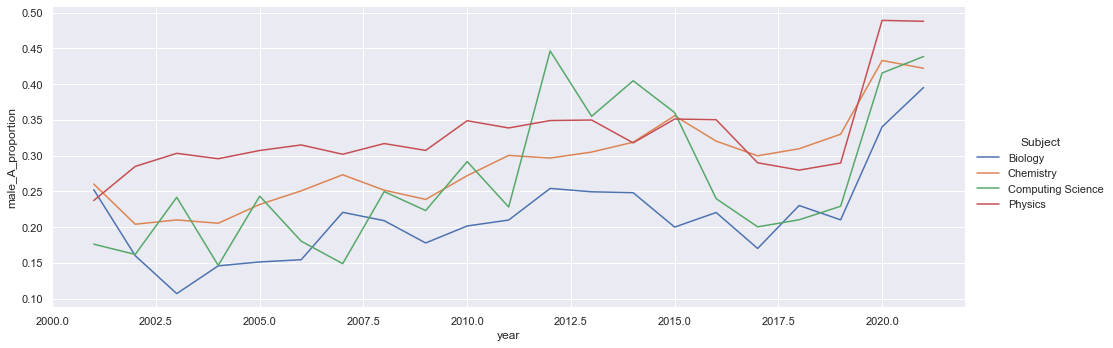

In [106]:
g = sns.relplot(kind='line', data=AH_Science, x='year', y='male_A_proportion', hue='Subject', ci=None, aspect=2.75)

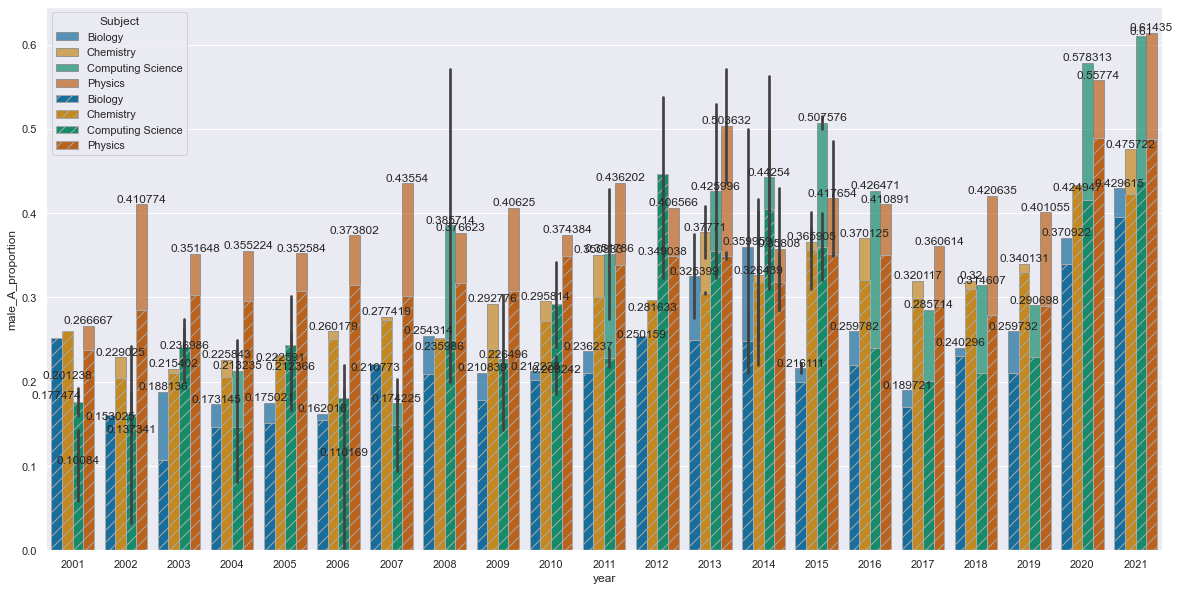

In [96]:
ig, ax = plt.subplots(figsize=(20, 10))

# plot the all users
sns.barplot(x='year', y='female_A_proportion', data=AH_Science, hue='Subject', palette='colorblind', edgecolor='grey', alpha=0.7, ax=ax)

# annotate the bars in the 3 containers (1 container per hue group)
for c in ax.containers:
    ax.bar_label(c)
    
# plot the 'male_A', which adds 3 more containers to ax
sns.barplot(x='year', y='male_A_proportion', data=AH_Science, hue='Subject', palette='colorblind', edgecolor='darkgrey', hatch='//', ax=ax)

# iterate through the last 3 new containers containing the hatched groups 
for c in ax.containers[3:]:
    
    # get the hue label, which will be used to select the data group
    hue_label = c.get_label()
    # select the data based on hue_label
    data = AH_Science.loc[AH_Science.Subject.eq(hue_label), ['female_A_proportion', 'male_A_proportion']]
    # customize the labels
    #labels = [f"{v.get_height()}: {data.iloc[i, 1]:0.2f}%" for i, v in enumerate(c)]
    # add the labels
    #ax.bar_label(c, labels=labels)

plt.show()

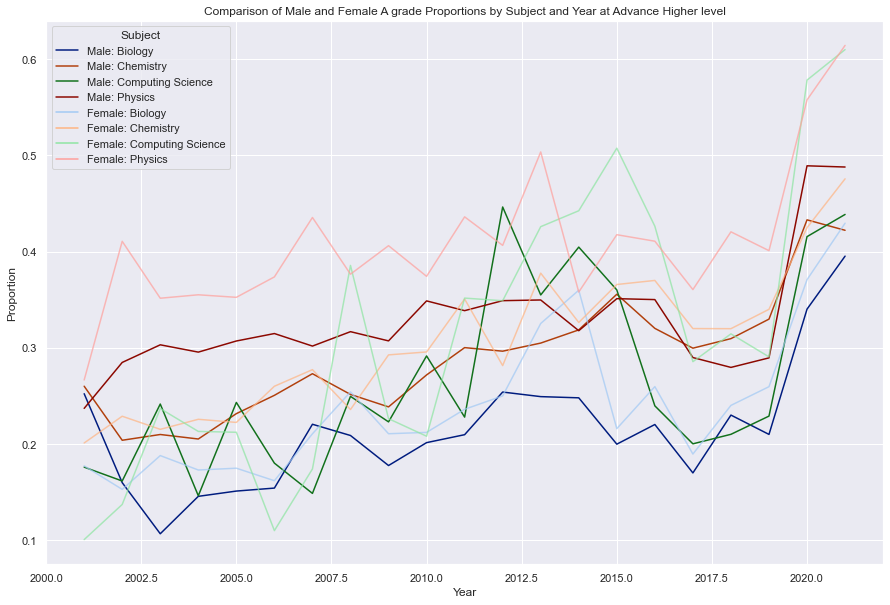

In [105]:

plt.figure(figsize=(15, 10))  # Adjust the size as needed

sns.lineplot(data=AH_Science, x='year', y='male_A_proportion', hue='Subject', palette='dark', ci=None)
sns.lineplot(data=AH_Science, x='year', y='female_A_proportion', hue='Subject', palette='pastel', ci=None, alpha=0.7)
plt.legend(title='Subject')
plt.title("Comparison of Male and Female A grade Proportions by Subject and Year at Advance Higher level")
plt.xlabel("Year")
plt.ylabel("Proportion")

# Add custom legend labels
handles, labels = plt.gca().get_legend_handles_labels()
custom_labels = []

for i, label in enumerate(labels):
    if i < len(labels) // 2:
        custom_labels.append('Male: ' + label)
    else:
        custom_labels.append('Female: ' + label)

plt.legend(handles, custom_labels, title='Subject')


plt.show()

<Figure size 864x576 with 0 Axes>

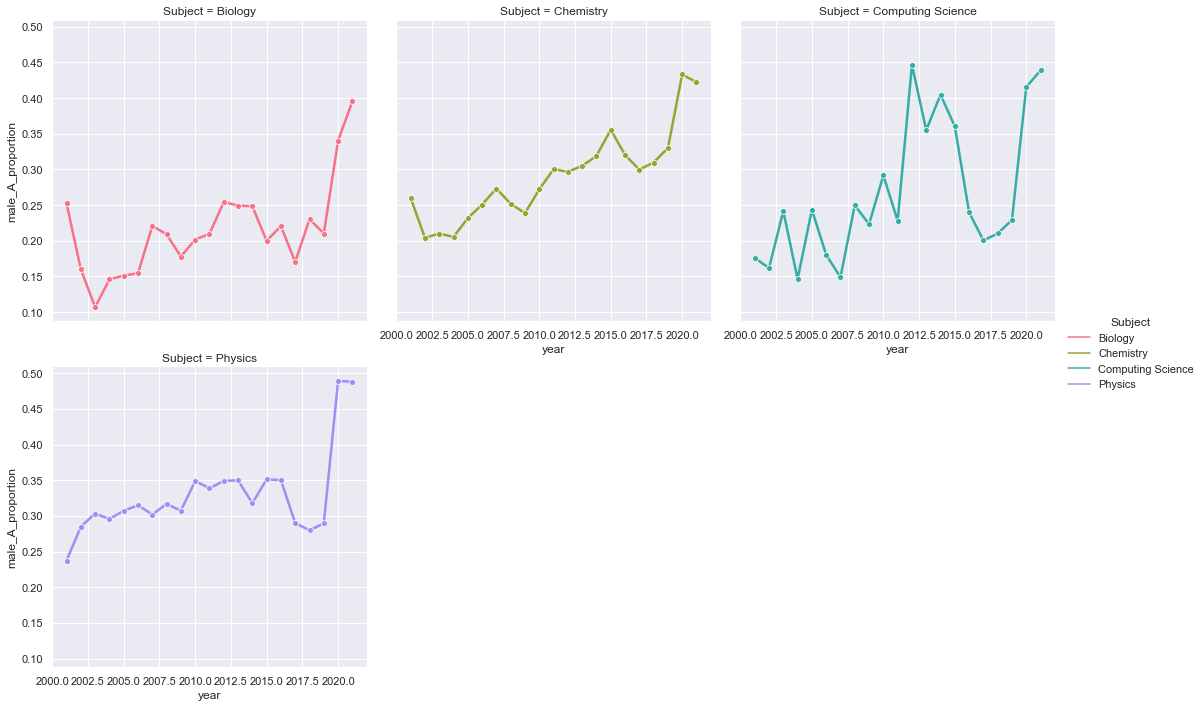

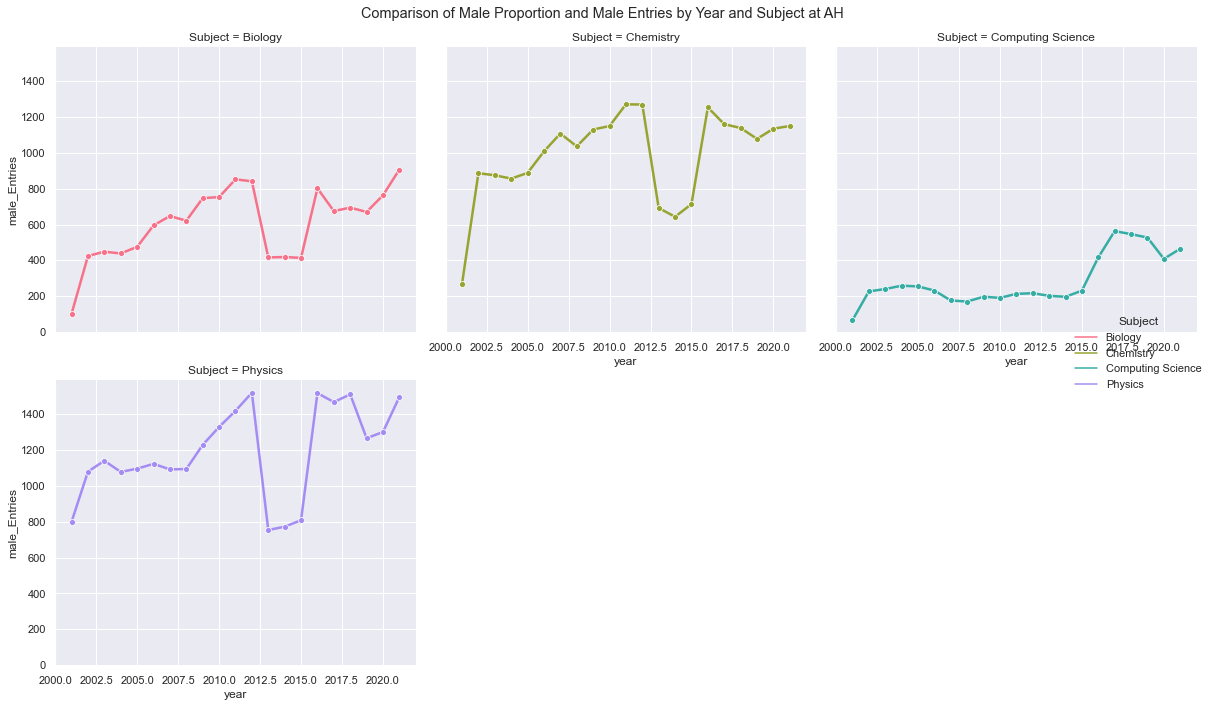

In [98]:

sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(12, 8))  # Adjust the size as needed

# Plotting 'female_A_proportion' and 'female_entries' by year and subject
sns.relplot(data=AH_Science, x='year', y='male_A_proportion', hue='Subject', col='Subject', col_wrap=3, palette='husl', linewidth=2.5, kind='line', marker='o', ci=None)
sns.relplot(data=AH_Science, x='year', y='male_Entries', hue='Subject', col='Subject', col_wrap=3, palette='husl', linewidth=2.5, kind='line', marker='o', ci=None)

plt.suptitle("Comparison of Male Proportion and Male Entries by Year and Subject at AH")
plt.tight_layout()
plt.show()


<Figure size 864x576 with 0 Axes>

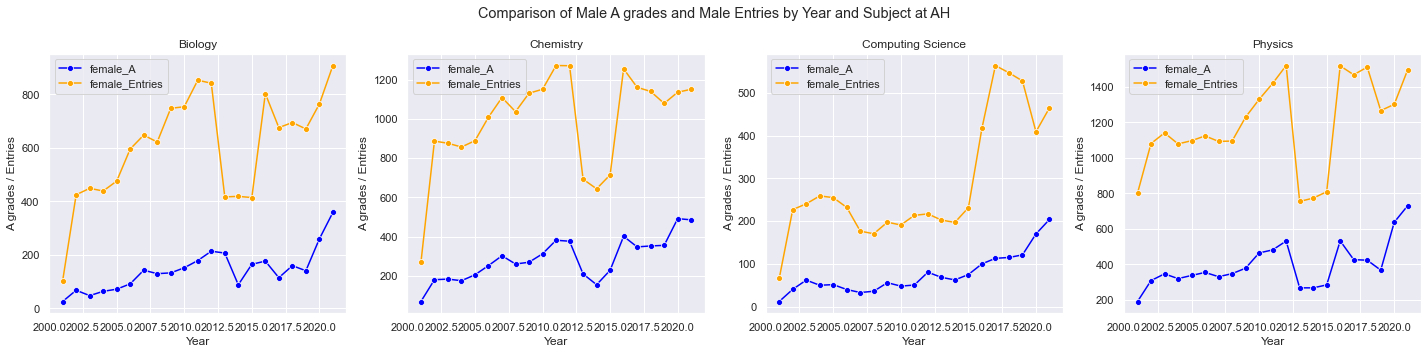

In [124]:

sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(12, 8))  # Adjust the size as needed

# Get unique subjects
subjects = AH_Science['Subject'].unique()
num_subjects = len(subjects)

# Create subplots for each subject
fig, axes = plt.subplots(nrows=1, ncols=num_subjects, figsize=(5*num_subjects, 5))

# Plot 'female_A_proportion' and 'female_entries' for each subject
for i, subject in enumerate(subjects):
    ax = axes[i]
    sns.lineplot(data=AH_Science[AH_Science['Subject'] == subject], x='year', y='male_A', ax=ax, color='blue', marker='o', label='female_A', ci=None)
    sns.lineplot(data=AH_Science[AH_Science['Subject'] == subject], x='year', y='male_Entries', ax=ax, color='orange', marker='o', label='female_Entries', ci=None)
    ax.set_title(subject)
    ax.set_xlabel('Year')
    ax.set_ylabel('A grades / Entries')
    ax.legend()

plt.suptitle("Comparison of Male A grades and Male Entries by Year and Subject at AH")
plt.tight_layout()
plt.show()


<Figure size 864x576 with 0 Axes>

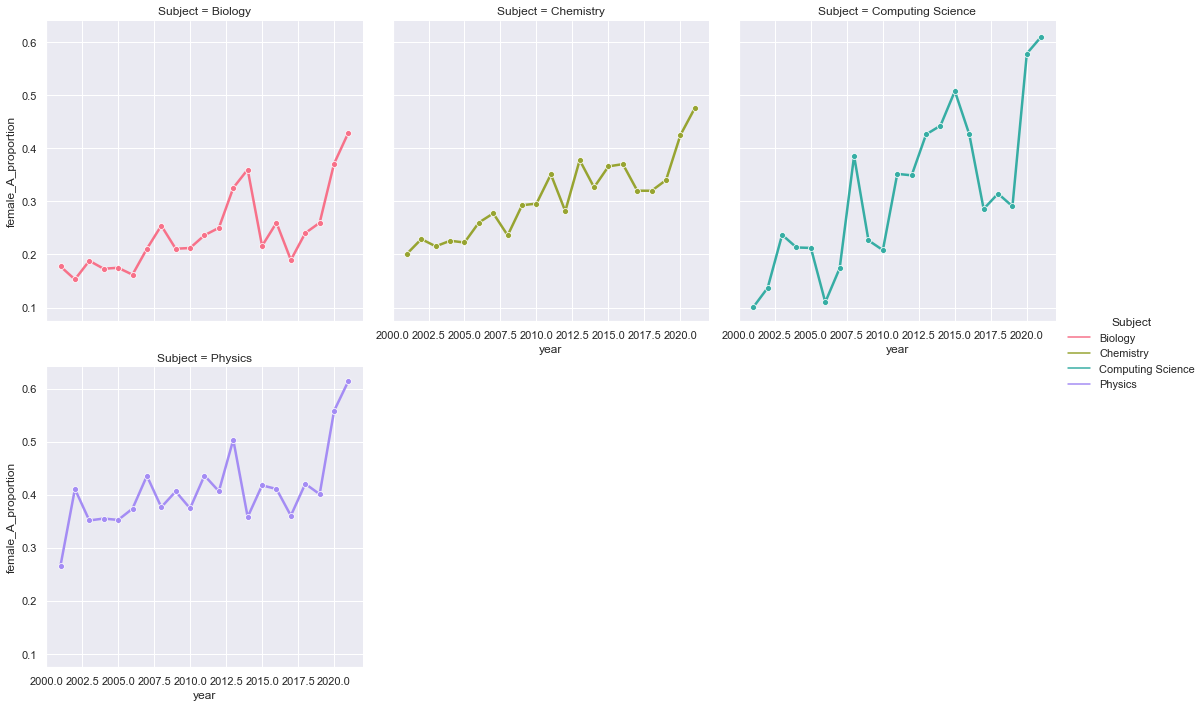

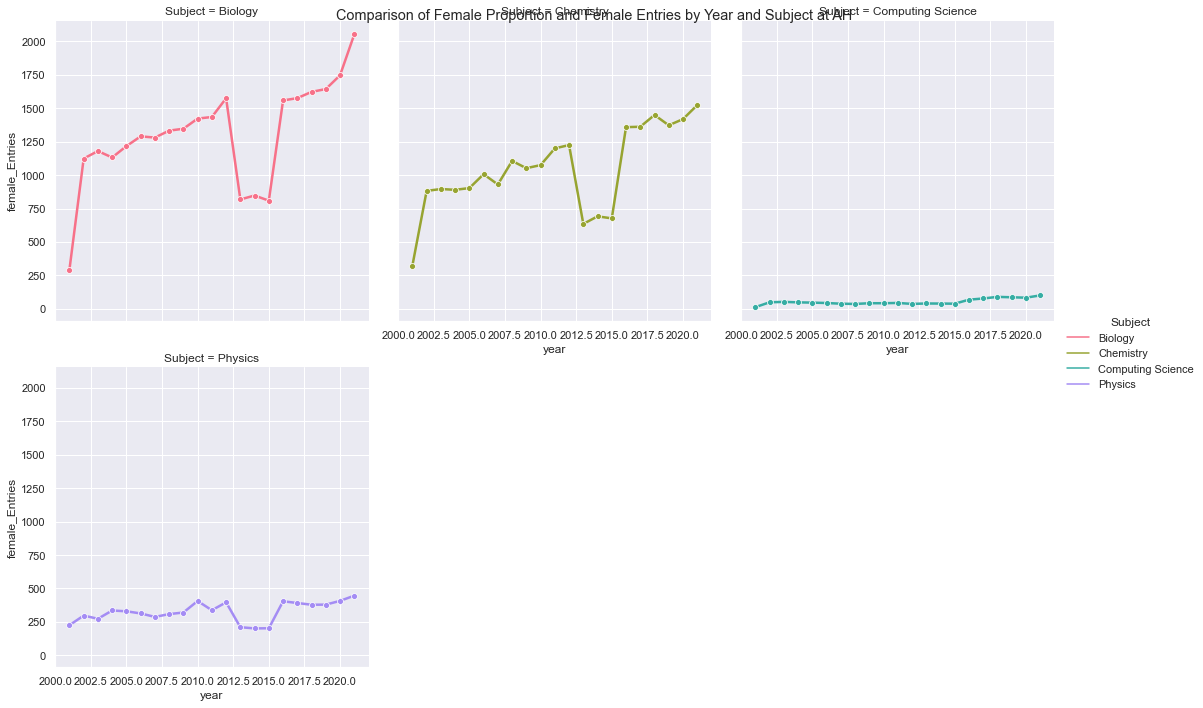

In [103]:

sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(12, 8))  # Adjust the size as needed

# Plotting 'female_A_proportion' and 'female_entries' by year and subject
sns.relplot(data=AH_Science, x='year', y='female_A_proportion', hue='Subject', col='Subject', col_wrap=3, palette='husl', linewidth=2.5, kind='line', marker='o', ci=None)
sns.relplot(data=AH_Science, x='year', y='female_Entries', hue='Subject', col='Subject', col_wrap=3, palette='husl', linewidth=2.5, kind='line', marker='o', ci=None)

plt.suptitle("Comparison of Female Proportion and Female Entries by Year and Subject at AH")
#plt.tight_layout()
plt.show()


<Figure size 864x576 with 0 Axes>

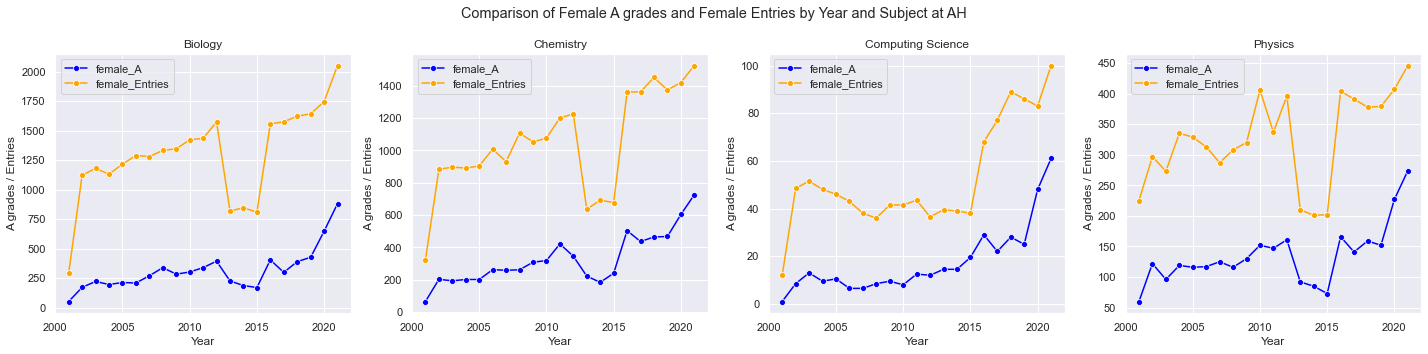

In [125]:

sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(12, 8))  # Adjust the size as needed

# Get unique subjects
subjects = AH_Science['Subject'].unique()
num_subjects = len(subjects)

# Create subplots for each subject
fig, axes = plt.subplots(nrows=1, ncols=num_subjects, figsize=(5*num_subjects, 5))

# Plot 'female_A_proportion' and 'female_entries' for each subject
for i, subject in enumerate(subjects):
    ax = axes[i]
    sns.lineplot(data=AH_Science[AH_Science['Subject'] == subject], x='year', y='female_A', ax=ax, color='blue', marker='o', label='female_A', ci=None)
    sns.lineplot(data=AH_Science[AH_Science['Subject'] == subject], x='year', y='female_Entries', ax=ax, color='orange', marker='o', label='female_Entries', ci=None)
    ax.set_title(subject)
    ax.set_xlabel('Year')
    ax.set_ylabel('A grades / Entries')
    ax.legend()

plt.suptitle("Comparison of Female A grades and Female Entries by Year and Subject at AH")
plt.tight_layout()
plt.show()
